In [1]:
import csv
import pandas as pd
import numpy as np
import glob
import matplotlib
import scipy as sp
from matplotlib import pyplot as plt
from itertools import cycle, islice

In [2]:
#loads file and puts data into dataframe
def organize_trial_by_trial(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"game number", 1:"trial", 2:"player", 3:"arm", 4:"probability", 5:"reward", 6:"time", 7:"P1 score", 8:"P2 score"})
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.apply(pd.to_numeric)
    df.head()
    
    #combining info in the same trial for both players together in the same row
    #player1 = df[df['player'] == 1].drop(columns = "P2 score").drop(columns = "player")
    #player1 = player1.reset_index().drop(columns = "index")
    #player1 = player1.rename(columns = {"arm":"P1 arm", "probability":"P1 prob", "reward":"P1 reward"})

    #player2 = df[df['player'] == 2].drop(columns = "P1 score").drop(columns = 'trial').drop(columns = 'player')
    #player2 = player2.reset_index().drop(columns = "index")
    #player2 = player2.rename(columns = {"arm":"P2 arm", "probability":"P2 prob", "reward":"P2 reward"})

    #result = pd.concat([player1, player2], axis=1, sort=False)
    return df

#TODO: function that pairs up P2(trial n) and P1(trial n+1)


#calls organize_trial_by_trial on each file
def combine_all_files(path):
    all_files = glob.glob(path + "/*.txt")
    df = pd.DataFrame()
    
    for filename in all_files:
        new_df = organize_trial_by_trial(filename)
        df = pd.concat([df, new_df], axis=0, ignore_index=True)
    return df

In [3]:
#gets score for g1 and g2
def get_score(df, player_number, game_number):
    if game_number == 1:
        row = 199
    elif game_number == 2:
        row = 399
    if player_number == 1:
        column = 'P1 score'
    elif player_number == 2:
        column = 'P2 score'
    score = df.loc[row, column]
    return score

In [4]:
#create a dataframes for scores
scores = pd.DataFrame(columns=['s_g1','s_g2','j_g1','j_g2'])

In [5]:
#version is 's' for single player and 'j' for joint
def call_get_score(df, version):
    p1_g1 = get_score(df, 1, 1)
    p1_g2 = get_score(df, 1, 2)
    p1_score_diff = p1_g2 - p1_g1
    if version == 'j':
        p2_g1 = get_score(df, 2, 1)
        p2_g2 = get_score(df, 2, 2)
        p2_score_diff = p2_g2 - p2_g1
        return p1_g1, p1_g2, p2_g1, p2_g2, p1_score_diff, p2_score_diff
    return p1_g1, p1_g2, p1_score_diff

In [6]:
#separate data frames for p1 and p2 
def separate_df(df, version):
    #df.set_index(df['trial'])
    df_p1 = df[df['player'] == 1]
    df_p1_g1 = df_p1[df['game number'] == 1]
    df_p1_g2 = df_p1[df['game number'] == 2]
    if version == 's':
        return df_p1_g1, df_p1_g2
    df_p2 = df[df['player'] ==2 ]
    df_p2_g1 = df_p2[df['game number'] == 1]
    df_p2_g2 = df_p2[df['game number'] == 2]
    return df_p1_g1, df_p1_g2, df_p2_g1, df_p2_g2

In [7]:
#needs work
def call_call_get_score(df, version):
    p1_g1 = df+'_'+'p1_'+'g1_'+'score'
    p1_g2 = df+'_'+'p1_'+'g2_'+'score'
    p2_g1 = df+'_'+'p2_'+'g1_'+'score'
    p2_g2 = df+'_'+'p2_'+'g2_'+'score'
    p1_g1, p1_g2, p2_g1, p2_g2 = call_get_score(df, version)
    return p1_g1, p1_g2, p2_g1, p2_g2

# Single Player Analysis

In [8]:
#loading the files and dataframes

In [9]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s01_gamedata.csv')
s01 = df
s01_p1_g1_score,s01_p1_g2_score,s01_score_diff = call_get_score(s01, 's')
s01.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,30,1,11.220698,1,0
1,1,1,2,1,90,1,2.742137,1,1
2,1,2,1,3,60,1,5.362458,2,1
3,1,2,2,1,90,1,3.699948,2,2
4,1,3,1,2,30,0,3.489552,2,2


In [10]:
#in the s files, p2 is the confederate
#NO SECOND GAME
df = organize_trial_by_trial('data/s02_gamedata.csv')
s02 = df
s02_p1_g1_score = get_score(s02, 1, 1)
s02.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,1,30,0,12.598357,0,0
1,1,1,2,1,90,1,2.182159,0,1
2,1,2,1,2,60,1,3.600245,1,1
3,1,2,2,1,90,1,2.628291,1,2
4,1,3,1,2,60,1,3.252174,2,2


In [11]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s03_gamedata.csv')
s03 = df
s03_p1_g1_score,s03_p1_g2_score,s03_score_diff = call_get_score(s03, 's')
s03.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,30,0,31.921890,0,0
1,1,1,2,1,90,1,4.758381,0,1
2,1,2,1,2,60,1,3.219123,1,1
3,1,2,2,1,90,1,3.491894,1,2
4,1,3,1,1,90,1,2.521189,2,2


In [12]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s05_gamedata.csv')
s05 = df
s05_p1_g1_score,s05_p1_g2_score,s05_score_diff = call_get_score(s05, 's')
s05.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,30,1,7.627847,1,0
1,1,1,2,1,90,1,3.360008,1,1
2,1,2,1,3,90,1,5.575300,2,1
3,1,2,2,1,90,1,5.711864,2,2
4,1,3,1,3,90,1,3.985995,3,2


In [13]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s06_gamedata.csv')
s06 = df
s06_p1_g1_score,s06_p1_g2_score,s06_score_diff = call_get_score(s06, 's')
s06.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,90,1,3.134130,1,0
1,1,1,2,1,90,1,9.395702,1,1
2,1,2,1,2,60,0,2.179541,1,1
3,1,2,2,1,90,1,2.545001,1,2
4,1,3,1,3,90,1,2.511049,2,2


In [14]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s07_gamedata.csv')
s07 = df
s07_p1_g1_score,s07_p1_g2_score,s07_score_diff = call_get_score(s07, 's')
s07.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,60,0,13.140095,0,0
1,1,1,2,1,90,1,2.417684,0,1
2,1,2,1,3,60,1,1.725920,1,1
3,1,2,2,1,90,1,2.810070,1,2
4,1,3,1,1,90,0,1.551831,1,2


In [15]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s08_gamedata.csv')
s08 = df
s08_p1_g1_score,s08_p1_g2_score,s08_score_diff = call_get_score(s08, 's')
s08.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,1,30,0,13.150472,0,0
1,1,1,2,1,90,1,2.550160,0,1
2,1,2,1,2,90,1,6.812722,1,1
3,1,2,2,1,90,1,3.497989,1,2
4,1,3,1,2,90,1,2.441523,2,2


In [16]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s09_gamedata.csv')
s09 = df
s09_p1_g1_score,s09_p1_g2_score,s09_score_diff = call_get_score(s09, 's')
s09.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,60,1,14.642494,1,0
1,1,1,2,1,90,1,2.997907,1,1
2,1,2,1,3,60,1,7.654677,2,1
3,1,2,2,1,90,0,2.905190,2,1
4,1,3,1,1,90,1,3.873310,3,1


In [17]:
score_diff = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's08', 's09'], 'score_diff':
     [s01_score_diff, s03_score_diff, s05_score_diff, s06_score_diff,
      s07_score_diff, s08_score_diff, s09_score_diff]})

# Score diff between G1 and G2

In [18]:
score_diff

,participant,score_diff
0,s01,14
1,s03,8
2,s05,11
3,s06,5
4,s07,5
5,s08,-10
6,s09,5


In [19]:
#increase in every participant except 1
#df excluding outliar
score_diff_ex = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's09'], 'score_diff':
     [s01_score_diff, s03_score_diff, s05_score_diff, s06_score_diff,
      s07_score_diff, s09_score_diff]})

In [20]:
score_diff_ex

,participant,score_diff
0,s01,14
1,s03,8
2,s05,11
3,s06,5
4,s07,5
5,s09,5


In [21]:
score_diff_mean = score_diff['score_diff'].mean()

In [22]:
score_diff_ex_mean = score_diff_ex['score_diff'].mean()

In [23]:
score_diff_mean

5.428571428571429

In [24]:
score_diff_ex_mean

8.0

# Scores in G1 and G2

In [25]:
s_scores_1 = pd.DataFrame({'participant':['s01', 's02', 's03', 's05', 
                               's06', 's07', 's08', 's09'], 'score':
     [s01_p1_g1_score, s02_p1_g1_score, s03_p1_g1_score, s05_p1_g1_score,
      s06_p1_g1_score, s07_p1_g1_score, s08_p1_g1_score, s09_p1_g1_score]})
s_scores_1.set_index('participant', inplace=True, drop=True)
s_scores_2 = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's08', 's09'], 'score':
    [s01_p1_g2_score, s03_p1_g2_score, s05_p1_g2_score, 
    s06_p1_g2_score, s07_p1_g2_score, s08_p1_g2_score, s09_p1_g2_score]})
s_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)
s_scores_1

,score
participant,
s01,60
s02,63
s03,63
s05,77
s06,82
s07,63
s08,90
s09,65


In [26]:
s_scores_2

,score
participant,
s01,74
s03,71
s05,88
s06,87
s07,68
s08,80
s09,70


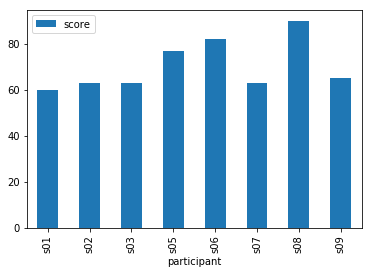

In [27]:
s_scores_1_bar = s_scores_1.plot.bar()

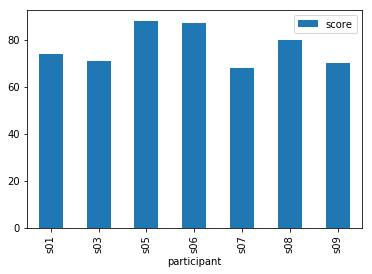

In [28]:
s_scores_2_bar = s_scores_2.plot.bar()

In [29]:
#combine g1 and g2 to one dataframe
s_combo = s_scores_1.append(s_scores_2)

In [30]:
'''s_combo = pd.DataFrame({'participant':['s01', 's01', 's02', 's03', 's03','s05', 's05'
                               's06', 's06','s07','s07','s08','s08','s09','s09'], 'score':
     [s01_p1_g1_score, s01_p1_g2_score, s02_p1_g1_score, s03_p1_g1_score, s03_p1_g2_score, s05_p1_g1_score,
      s05_p1_g2_score,s06_p1_g1_score,s06_p1_g2_score, s07_p1_g1_score,s07_p1_g2_score, s08_p1_g1_score,s08_p1_g2_score,
      s09_p1_g1_score, s09_p1_g2_score]})
s_combo.set_index('participant', inplace=True, drop=True)'''

"s_combo = pd.DataFrame({'participant':['s01', 's01', 's02', 's03', 's03','s05', 's05'\n                               's06', 's06','s07','s07','s08','s08','s09','s09'], 'score':\n     [s01_p1_g1_score, s01_p1_g2_score, s02_p1_g1_score, s03_p1_g1_score, s03_p1_g2_score, s05_p1_g1_score,\n      s05_p1_g2_score,s06_p1_g1_score,s06_p1_g2_score, s07_p1_g1_score,s07_p1_g2_score, s08_p1_g1_score,s08_p1_g2_score,\n      s09_p1_g1_score, s09_p1_g2_score]})\ns_combo.set_index('participant', inplace=True, drop=True)"

In [31]:

#new_index = ('s01_g1','s01_g2','s02_g1','s03_g1','s03_g2','s05_g1','s05_g2', 
                               #'s06_g1','s06_g2','s07_g1','s07_g2','s08_g1','s08_g2','s09_g1','s09_g2')
#s_combo.index = new_index

In [32]:
s_combo

,score
participant,
s01,60
s02,63
s03,63
s05,77
s06,82
s07,63
s08,90
s09,65
s01,74


In [33]:
s_combo = s_combo.sort_values(by=['participant'])

In [34]:
s_combo

,score
participant,
s01,60
s01,74
s02,63
s03,63
s03,71
s05,77
s05,88
s06,82
s06,87


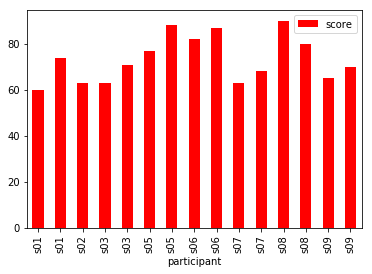

In [35]:
#need to make g1 and g2 bars diff colors
colors = list(islice(cycle(['red','blue','red','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue']),None,len(s_combo)))
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
s_combo_bar = s_combo.plot(kind='bar',color=colors)

In [36]:
s_scores_1_mean = s_scores_1.mean()

In [37]:
s_scores_1_std = s_scores_1.std()

In [38]:
s_scores_2_mean = s_scores_2.mean()

In [39]:
s_scores_2_std = s_scores_1.std()

In [40]:
s_scores_2_std = s_scores_2.std()

In [41]:
#does everyone do better in the second game? 
#does the player that did better in the first game always do better in the second game?

In [42]:
#j_g1_scores = pd.DataFrame([j02_p1_g1_score, j02_p2_g1_score, j01_p1_g1_score, j01_p2_g1_score, j03_p1_g1_score, j03_p2_g1],index = ['j02_p1_g1_score', 'j02_p2_g1_score', 'jo1_p1_g1_score', 'j01_p2_g1_score', 'j03_p1_g1', 'j03_p2_g1'], columns=['score'])

In [43]:
s_list = [s01,s02,s03,s05,s06,s07,s08,s09]

In [44]:
#call separate_df for each frame (turn into a loop)
s01_p1_g1, s01_p1_g2 = separate_df(s01, 's')
s02_p1_g1, s02_p1_g2 = separate_df(s02, 's')
s03_p1_g1, s03_p1_g2 = separate_df(s03, 's')
s05_p1_g1, s05_p1_g2 = separate_df(s05, 's')
s06_p1_g1, s06_p1_g2 = separate_df(s06, 's')
s07_p1_g1, s07_p1_g2 = separate_df(s07, 's')
s08_p1_g1, s08_p1_g2 = separate_df(s08, 's')
s09_p1_g1, s09_p1_g2 = separate_df(s09, 's')

/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [45]:
s01_p1_g1

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,30,1,11.220698,1,0
2,1,2,1,3,60,1,5.362458,2,1
4,1,3,1,2,30,0,3.489552,2,2
6,1,4,1,3,60,0,3.210886,2,3
8,1,5,1,3,60,1,2.904784,3,4
10,1,6,1,1,90,0,3.241885,3,5
12,1,7,1,1,90,1,2.839384,4,6
14,1,8,1,2,30,0,2.985595,4,7
16,1,9,1,2,30,1,2.581026,5,8
18,1,10,1,2,30,0,2.472073,5,9


In [46]:
#counts the number of times each player chose each arm in games 1 and 2
s01_p1_g1_count = s01_p1_g1['probability'].value_counts(sort=False)
s01_p1_g2_count = s01_p1_g2['probability'].value_counts(sort=False)
s02_p1_g1_count = s02_p1_g1['probability'].value_counts(sort=False) #no second game
s03_p1_g1_count = s03_p1_g1['probability'].value_counts(sort=False)
s03_p1_g2_count = s03_p1_g2['probability'].value_counts(sort=False)
s05_p1_g1_count = s05_p1_g1['probability'].value_counts(sort=False)
s05_p1_g2_count = s05_p1_g2['probability'].value_counts(sort=False)
s06_p1_g1_count = s06_p1_g1['probability'].value_counts(sort=False)
s06_p1_g2_count = s06_p1_g2['probability'].value_counts(sort=False)
s07_p1_g1_count = s07_p1_g1['probability'].value_counts(sort=False)
s07_p1_g2_count = s07_p1_g2['probability'].value_counts(sort=False)
s08_p1_g1_count = s08_p1_g1['probability'].value_counts(sort=False)
s08_p1_g2_count = s08_p1_g2['probability'].value_counts(sort=False)
s09_p1_g1_count = s09_p1_g1['probability'].value_counts(sort=False)
s09_p1_g2_count = s09_p1_g2['probability'].value_counts(sort=False)

# Dynamic Probability Learning Model

In [47]:
#create dataframe with first 20 trials
#change 20 to meaningful number
s01_p1_g1_0to20 = s01_p1_g1[:20]

In [48]:
s01_p1_g1_0to20

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,30,1,11.220698,1,0
2,1,2,1,3,60,1,5.362458,2,1
4,1,3,1,2,30,0,3.489552,2,2
6,1,4,1,3,60,0,3.210886,2,3
8,1,5,1,3,60,1,2.904784,3,4
10,1,6,1,1,90,0,3.241885,3,5
12,1,7,1,1,90,1,2.839384,4,6
14,1,8,1,2,30,0,2.985595,4,7
16,1,9,1,2,30,1,2.581026,5,8
18,1,10,1,2,30,0,2.472073,5,9


In [49]:
#get value counts for first 20 trials
s01_p1_g1_count_0to20 = s01_p1_g1_0to20['probability'].value_counts(sort=False)

In [50]:
s01_p1_g1_count_0to20

90     3
60    10
30     7
Name: probability, dtype: int64

In [51]:
#create df's that are subsets of 0to20 for each probabolity
s01_p1_g1_0to20_30 = s01_p1_g1_0to20[s01_p1_g1_0to20['probability'] == 30]
s01_p1_g1_0to20_60 = s01_p1_g1_0to20[s01_p1_g1_0to20['probability'] == 60]
s01_p1_g1_0to20_90 = s01_p1_g1_0to20[s01_p1_g1_0to20['probability'] == 90]

In [52]:
s01_p1_g1_0to20_30

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,30,1,11.220698,1,0
4,1,3,1,2,30,0,3.489552,2,2
14,1,8,1,2,30,0,2.985595,4,7
16,1,9,1,2,30,1,2.581026,5,8
18,1,10,1,2,30,0,2.472073,5,9
32,1,17,1,2,30,0,2.331370,10,16
34,1,18,1,2,30,1,1.615854,11,17


In [53]:
#count the number of rewards and no rewards for each probability
s01_p1_g1_0to20_30_counts = s01_p1_g1_0to20_30['reward'].value_counts()
s01_p1_g1_0to20_60_counts = s01_p1_g1_0to20_60['reward'].value_counts()
s01_p1_g1_0to20_90_counts = s01_p1_g1_0to20_90['reward'].value_counts()

In [54]:
s01_p1_g1_0to20_30_counts

0    4
1    3
Name: reward, dtype: int64

In [55]:
s01_p1_g1_0to20_30_prob = (s01_p1_g1_0to20_30_counts[1]/(s01_p1_g1_count_0to20[30]))
s01_p1_g1_0to20_60_prob = (s01_p1_g1_0to20_60_counts[1]/(s01_p1_g1_count_0to20[60]))
s01_p1_g1_0to20_90_prob = (s01_p1_g1_0to20_90_counts[1]/(s01_p1_g1_count_0to20[90]))

In [56]:
s01_p1_g1_0to20_30_prob

0.42857142857142855

In [57]:
s01_p1_g1_0to20_probs = pd.DataFrame([s01_p1_g1_0to20_30_prob, s01_p1_g1_0to20_60_prob, s01_p1_g1_0to20_90_prob],
                         index=['30', '60', '90'])
s01_p1_g1_0to20_probs.rename(columns={0:'prob'})

,prob
30,0.428571
60,0.700000
90,0.666667


In [58]:
s_g1_counts = pd.DataFrame([s01_p1_g1_count, s02_p1_g1_count, s03_p1_g1_count, 
                            s05_p1_g1_count, s06_p1_g1_count, s07_p1_g1_count, s08_p1_g1_count, s09_p1_g1_count],
                          index=['s01_p1_g1_count', 's02_p1_g1_count', 's03_p1_g1_count', 
                            's05_p1_g1_count', 's06_p1_g1_count', 's07_p1_g1_count', 's08_p1_g1_count', 's09_p1_g1_count'])

In [59]:
s_g1_counts

,30,60,90
s01_p1_g1_count,38,43,19
s02_p1_g1_count,23,27,50
s03_p1_g1_count,28,38,34
s05_p1_g1_count,11,35,54
s06_p1_g1_count,11,13,76
s07_p1_g1_count,25,29,46
s08_p1_g1_count,2,6,92
s09_p1_g1_count,17,38,45


# look at 21-100 in 5 trial intervals

In [73]:
def split_df(df):
    one = df[21:26]
    two = df[26:31]
    three = df[31:36]
    four = df[36:41]
    five = df[41:46]
    ''''six = df[46:51]
    seven = df[51:56]
    eight = df[56:61]
    nine = df[61:66]
    ten = df[66:71]
    eleven = df[71:76]
    twelve = df[76:81]
    thirteen = df[81:86]
    fourteen = df[86:91]
    fifteen = df[91:96]
    sixteen = df[96:100]'''
    return one,two,three,four,five

In [74]:
def split_df_abs(df, start, interval):
    n = (100 - start)/interval
    for x in range(0, n):
        segment = df[start+x:start+x+n]

In [83]:
s01_p1_g1_list = [1,2,3,4,5]

In [76]:
#not working
s01_p1_g1_list[0],s01_p1_g1_list[1],s01_p1_g1_list[2],s01_p1_g1_list[3],s01_p1_g1_list[4]=split_df(s01_p1_g1)

In [89]:
s01_p1_g1_1 = s01_p1_g1[21:26]
s01_p1_g1_2 = s01_p1_g1[26:31]
s01_p1_g1_3 = s01_p1_g1[31:36]
s01_p1_g1_4 = s01_p1_g1[36:41]
s01_p1_g1_5 = s01_p1_g1[41:46]

In [90]:
s01_p1_g1_1

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
42,1,22,1,3,60,0,1.921934,13,21
44,1,23,1,3,60,0,1.533652,13,22
46,1,24,1,3,60,1,2.955235,14,23
48,1,25,1,2,30,0,1.914423,14,24
50,1,26,1,2,30,0,1.888488,14,25


In [91]:
list = [s01_p1_g1_1,s01_p1_g1_2,s01_p1_g1_3,s01_p1_g1_4,s01_p1_g1_5]

In [96]:
#not working
''''
for i in range(5):
    counts[i] = list[i]['probability'].value_counts(sort=False)''''''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-96-8ade3d9413ab>, line 4)

In [97]:
s01_p1_g1_1_counts = s01_p1_g1_1['probability'].value_counts(sort=False)

In [98]:
s01_p1_g1_1_counts

60    3
30    2
Name: probability, dtype: int64

In [ ]:
#need to: get rate and compare to rate in 0-20
#for next interval, need to update with rate from 0-20 thusfar 

# Choices in G1 and G2

In [ ]:
s_g1_counts

In [ ]:
s_g1_counts_bar = s_g1_counts.plot.bar()

In [ ]:
s_g1_low = np.mean(s_g1_counts.iloc[:,0])

In [ ]:
s_g1_med = np.mean(s_g1_counts.iloc[:,1])

In [ ]:
s_g1_high = np.mean(s_g1_counts.iloc[:,2])

In [ ]:
s_g1_low_std = np.std(s_g1_counts.iloc[:,0])
s_g1_med_std = np.std(s_g1_counts.iloc[:,1])
s_g1_high_std = np.std(s_g1_counts.iloc[:,2])

In [ ]:
s_g1_low

In [ ]:
s_g1_med

In [ ]:
s_g1_high

In [ ]:
s_g2_counts = pd.DataFrame([s01_p1_g2_count, s03_p1_g2_count, 
                            s05_p1_g2_count, s06_p1_g2_count, s07_p1_g2_count, s08_p1_g2_count, s09_p1_g2_count],
                          index=['s01_p1_g2_count', 's03_p1_g2_count', 
                            's05_p1_g2_count', 's06_p1_g2_count', 's07_p1_g2_count', 's08_p1_g2_count', 's09_p1_g2_count'])

In [ ]:
s_g2_counts

In [ ]:
#maximizing and matching?

In [ ]:
s_g2_counts_bar = s_g2_counts.plot.bar()

In [ ]:
s_g2_low = np.mean(s_g2_counts.iloc[:,0])
s_g2_med = np.mean(s_g2_counts.iloc[:,1])
s_g2_high = np.mean(s_g2_counts.iloc[:,2])

In [ ]:
s_g2_low_std = np.std(s_g2_counts.iloc[:,0])
s_g2_med_std = np.std(s_g2_counts.iloc[:,1])
s_g2_high_std = np.std(s_g2_counts.iloc[:,2])

In [ ]:
s_g2_low

In [ ]:
s_g2_med

In [ ]:
s_g2_high

# Joint Analysis

In [ ]:
df = organize_trial_by_trial('data/j01_gamedata.csv')
j01 = df
j01_p1_g1_score,j01_p1_g2_score,j01_p2_g1_score,j01_p2_g2_score,j01_p1_diff,j01_p2_diff = call_get_score(j01, 'j')
j01.head()

In [ ]:
df = organize_trial_by_trial('data/j02_gamedata.csv')
j02 = df
j02_p1_g1_score,j02_p1_g2_score,j02_p2_g1_score,j02_p2_g2_score,j02_p1_diff,j02_p2_diff = call_get_score(j02, 'j')
j02.head()

In [ ]:
df = organize_trial_by_trial('data/j03_gamedata.csv')
j03 = df
j03_p1_g1_score,j03_p1_g2_score,j03_p2_g1_score,j03_p2_g2_score,j03_p1_diff,j03_p2_diff = call_get_score(j03, 'j')
j03.head()

In [ ]:
df = organize_trial_by_trial('data/j04_gamedata.csv')
j04 = df
j04_p1_g1_score,j04_p1_g2_score,j04_p2_g1_score,j04_p2_g2_score,j04_p1_diff,j04_p2_diff = call_get_score(j04, 'j')
j04.head()

In [ ]:
df = organize_trial_by_trial('data/j05_gamedata.csv')
j05 = df
j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,j05_p2_g2_score,j05_p1_diff,j05_p2_diff = call_get_score(j05, 'j')
j05.head()

In [ ]:
df = organize_trial_by_trial('data/j06_gamedata.csv')
j06 = df
j06_p1_g1_score,j06_p1_g2_score,j06_p2_g1_score,j06_p2_g2_score,j06_p1_diff,j06_p2_diff = call_get_score(j06, 'j')
j06.head()

In [ ]:
df = organize_trial_by_trial('data/j07_gamedata.csv')
j07 = df
j07_p1_g1_score,j07_p1_g2_score,j07_p2_g1_score,j07_p2_g2_score,j07_p1_diff,j07_p2_diff = call_get_score(j07, 'j')
j07.head()

In [ ]:
df = organize_trial_by_trial('data/j08_gamedata.csv')
j08 = df
j08_p1_g1_score,j08_p1_g2_score,j08_p2_g1_score,j08_p2_g2_score,j08_p1_diff,j08_p2_diff = call_get_score(j08, 'j')
j08.head()

# Scores in G1 and G2

In [ ]:
j_scores_1 = pd.DataFrame({'participant':['j01_p1_g1_score','j01_p2_g1_score','j02_p1_g1_score','j02_p2_g1_score','j03_p1_g1_score','j03_p2_g1_score','j04_p1_g1_score',
      'j04_p2_g1_score','j05_p1_g1_score','j05_p2_g1_score','j06_p1_g1_score','j06_p2_g1_score','j07_p1_g1_score','j07_p2_g1_score',
      'j08_p1_g1_score', 'j08_p2_g1_score'], 'score':
     [j01_p1_g1_score,j01_p2_g1_score,j02_p1_g1_score,j02_p2_g1_score,j03_p1_g1_score,j03_p2_g1_score,j04_p1_g1_score,
      j04_p2_g1_score,j05_p1_g1_score,j05_p2_g1_score,j06_p1_g1_score,j06_p2_g1_score,j07_p1_g1_score,j07_p2_g1_score,
      j08_p1_g1_score, j08_p2_g1_score]})
j_scores_1.set_index('participant', inplace=True, drop=True)
j_scores_2 = pd.DataFrame({'participant':['j01_p1_g2_score','j01_p2_g2_score','j02_p1_g2_score','j02_p2_g2_score','j03_p1_g2_score','j03_p2_g2_score','j04_p1_g2_score',
      'j04_p2_g2_score','j05_p1_g2_score','j05_p2_g2_score','j06_p1_g2_score','j06_p2_g2_score','j07_p1_g2_score','j07_p2_g2_score',
      'j08_p1_g2_score', 'j08_p2_g2_score'], 'score':
     [j01_p1_g2_score,j01_p2_g2_score,j02_p1_g2_score,j02_p2_g2_score,j03_p1_g2_score,j03_p2_g2_score,j04_p1_g2_score,
      j04_p2_g2_score,j05_p1_g2_score,j05_p2_g2_score,j06_p1_g2_score,j06_p2_g2_score,j07_p1_g2_score,j07_p2_g2_score,
      j08_p1_g2_score, j08_p2_g2_score]})
j_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)
j_scores_1

In [ ]:
j_scores_2

In [ ]:
j_scores_1_mean = j_scores_1.mean()

In [ ]:
j_scores_1_std = j_scores_1.std()

In [ ]:
j_scores_2_mean = j_scores_2.mean()

In [ ]:
j_scores_2_std = j_scores_2.std()

In [ ]:
#combine g1 and g2 to one dataframe
j_combo = j_scores_1.append(j_scores_2)

In [ ]:
j_combo

In [ ]:
j_combo = j_combo.sort_values(by=['participant'])

In [ ]:
j_combo_bar = j_combo.plot(kind='bar',color=colors)

In [ ]:
j_score_diff = pd.DataFrame({'participant':['j01_p1','j01_p2','j02_p1','j02_p2','j03_p1','j03_p2','j04_p1','j04_p2',
                                          'j05_p1','j05_p2','j06_p1','j06_p2','j07_p1','j07_p2','j06_p1','j06_p2'], 'score_diff':
     [j01_p1_diff,j01_p2_diff,j02_p1_diff,j02_p2_diff,j03_p1_diff,j03_p2_diff,j04_p1_diff,j04_p2_diff,
     j05_p1_diff,j05_p2_diff,j06_p1_diff,j06_p2_diff,j07_p1_diff,j07_p2_diff,j08_p1_diff,j08_p2_diff]})

In [ ]:
j_score_diff

In [ ]:
#impairs learning?

In [ ]:
#pattern within sessions for score_diff?
#5 ppl did worse second time; joint interfered with learning

In [ ]:
j_score_diff_mean = j_score_diff['score_diff'].mean()

In [ ]:
j_score_diff_mean

# Choice Distributions

In [ ]:
j01_p1_g1, j01_p1_g2, j01_p2_g1, j01_p2_g2 = separate_df(j01, 'j')
j02_p1_g1, j02_p1_g2, j02_p2_g1, j02_p2_g2 = separate_df(j02, 'j')
j03_p1_g1, j03_p1_g2, j03_p2_g1, j03_p2_g2 = separate_df(j03, 'j')
j04_p1_g1, j04_p1_g2, j04_p2_g1, j04_p2_g2 = separate_df(j04, 'j')
j05_p1_g1, j05_p1_g2, j05_p2_g1, j05_p2_g2 = separate_df(j05, 'j')
j06_p1_g1, j06_p1_g2, j06_p2_g1, j06_p2_g2 = separate_df(j06, 'j')
j07_p1_g1, j07_p1_g2, j07_p2_g1, j07_p2_g2 = separate_df(j07, 'j')
j08_p1_g1, j08_p1_g2, j08_p2_g1, j08_p2_g2 = separate_df(j08, 'j')

In [ ]:
j01_p1_g1_count = j01_p1_g1['probability'].value_counts(sort=False)
j01_p1_g2_count = j01_p1_g2['probability'].value_counts(sort=False)
j01_p2_g1_count = j01_p2_g1['probability'].value_counts(sort=False)
j01_p2_g2_count = j01_p2_g2['probability'].value_counts(sort=False)
j02_p1_g1_count = j02_p1_g1['probability'].value_counts(sort=False)
j02_p1_g2_count = j02_p1_g2['probability'].value_counts(sort=False)
j02_p2_g1_count = j02_p2_g1['probability'].value_counts(sort=False)
j02_p2_g2_count = j02_p2_g2['probability'].value_counts(sort=False)
j03_p1_g1_count = j03_p1_g1['probability'].value_counts(sort=False)
j03_p1_g2_count = j03_p1_g2['probability'].value_counts(sort=False)
j03_p2_g1_count = j03_p2_g1['probability'].value_counts(sort=False)
j03_p2_g2_count = j03_p2_g2['probability'].value_counts(sort=False)
j04_p1_g1_count = j04_p1_g1['probability'].value_counts(sort=False)
j04_p1_g2_count = j04_p1_g2['probability'].value_counts(sort=False)
j04_p2_g1_count = j04_p2_g1['probability'].value_counts(sort=False)
j04_p2_g2_count = j04_p2_g2['probability'].value_counts(sort=False)
j05_p1_g1_count = j05_p1_g1['probability'].value_counts(sort=False)
j05_p1_g2_count = j05_p1_g2['probability'].value_counts(sort=False)
j05_p2_g1_count = j05_p2_g1['probability'].value_counts(sort=False)
j05_p2_g2_count = j05_p2_g2['probability'].value_counts(sort=False)
j06_p1_g1_count = j06_p1_g1['probability'].value_counts(sort=False)
j06_p1_g2_count = j06_p1_g2['probability'].value_counts(sort=False)
j06_p2_g1_count = j06_p2_g1['probability'].value_counts(sort=False)
j06_p2_g2_count = j06_p2_g2['probability'].value_counts(sort=False)
j07_p1_g1_count = j07_p1_g1['probability'].value_counts(sort=False)
j07_p1_g2_count = j07_p1_g2['probability'].value_counts(sort=False)
j07_p2_g1_count = j06_p2_g1['probability'].value_counts(sort=False)
j07_p2_g2_count = j06_p2_g2['probability'].value_counts(sort=False)
j08_p1_g1_count = j08_p1_g1['probability'].value_counts(sort=False)
j08_p1_g2_count = j08_p1_g2['probability'].value_counts(sort=False)
j08_p2_g1_count = j08_p2_g1['probability'].value_counts(sort=False)
j08_p2_g2_count = j08_p2_g2['probability'].value_counts(sort=False)

In [ ]:
j01_p1_g1_count

In [ ]:
j01_p1_g2_count

In [ ]:
j01_p2_g1_count

In [ ]:
j01_p2_g2_count

In [ ]:
j02_p1_g1_count

In [ ]:
j02_p1_g2_count

In [ ]:
j02_p2_g1_count

In [ ]:
j02_p2_g2_count

In [ ]:
j03_p1_g1_count

In [ ]:
j03_p1_g2_count

In [ ]:
j03_p2_g1_count

In [ ]:
j03_p2_g2_count

In [ ]:
j_g1_counts = pd.DataFrame([j01_p1_g1_count, j01_p2_g1_count, j02_p1_g1_count, j02_p2_g1_count, 
                            j03_p1_g1_count, j03_p2_g1_count, j04_p1_g1_count, j04_p2_g1_count,
                           j05_p1_g1_count,j05_p2_g1_count, j06_p1_g1_count, j06_p2_g1_count, j07_p1_g1_count, 
                            j07_p2_g1_count, j08_p1_g1_count, j08_p2_g1_count],
                          index=['j01_p1_g1_count', 'j01_p2_g1_count', 'j02_p1_g1_count', 'j02_p2_g1_count', 
                            'j03_p1_g1_count', 'j03_p2_g1_count', 'j04_p1_g1_count', 'j04_p2_g1_count',
                           'j05_p1_g1_count','j05_p2_g1_count', 'j06_p1_g1_count', 'j06_p2_g1_count', 'j07_p1_g1_count', 
                            'j07_p2_g1_count', 'j08_p1_g1_count', 'j08_p2_g1_count'])

In [ ]:
j_g1_counts

In [ ]:
j_g1_low = np.mean(j_g1_counts.iloc[:,0])
j_g1_med = np.mean(j_g1_counts.iloc[:,1])
j_g1_high = np.mean(j_g1_counts.iloc[:,2])

j_g1_low_std = np.std(j_g1_counts.iloc[:,0])
j_g1_med_std = np.std(j_g1_counts.iloc[:,1])
j_g1_high_std = np.std(j_g1_counts.iloc[:,2])

In [ ]:
j_g1_low

In [ ]:
j_g1_med

In [ ]:
j_g1_high

In [ ]:
#social matching

In [ ]:
j_g2_counts = pd.DataFrame([j01_p1_g2_count, j01_p2_g2_count, j02_p1_g2_count, j02_p2_g2_count, 
                            j03_p1_g2_count, j03_p2_g2_count, j04_p1_g2_count, j04_p2_g2_count,
                           j05_p1_g2_count,j05_p2_g2_count, j06_p1_g2_count, j06_p2_g2_count, j07_p1_g2_count, 
                            j07_p2_g2_count, j08_p1_g2_count, j08_p2_g2_count],
                          index=['j01_p1_g2_count', 'j01_p2_g2_count', 'j02_p1_g2_count', 'j02_p2_g2_count', 
                            'j03_p1_g2_count', 'j03_p2_g2_count', 'j04_p1_g2_count', 'j04_p2_g2_count',
                           'j05_p1_g2_count','j05_p2_g2_count', 'j06_p1_g2_count', 'j06_p2_g2_count', 'j07_p1_g2_count', 
                            'j07_p2_g2_count', 'j08_p1_g2_count', 'j08_p2_g2_count'])

In [ ]:
j_g2_counts

In [ ]:
j_g2_low = np.mean(j_g2_counts.iloc[:,0])
j_g2_med = np.mean(j_g2_counts.iloc[:,1])
j_g2_high = np.mean(j_g2_counts.iloc[:,2])

j_g2_low_std = np.std(j_g2_counts.iloc[:,0])
j_g2_med_std = np.std(j_g2_counts.iloc[:,1])
j_g2_high_std = np.std(j_g2_counts.iloc[:,2])

In [ ]:
j_g2_low

In [ ]:
j_g2_med

In [ ]:
j_g2_high

In [ ]:
j_g1_counts_bar = j_g1_counts.plot.bar()

In [ ]:
j_g2_counts_bar = j_g2_counts.plot.bar()

In [ ]:
#difference in 60% choices

# Combined Tables

In [ ]:
#NEEDS WORK
scores_df = pd.DataFrame({'score':[s_scores_1_mean, s_scores_2_mean, j_scores_1_mean, j_scores_2_mean],
                       'std':[s_scores_1_std,s_scores_2_std,j_scores_1_std,j_scores_2_std]},index = ['s_1','s_2',
                                                                                                     'j_1', 'j_2'])

In [ ]:
s_scores_1_mean

In [ ]:
pd.to_numeric(s_scores_1_mean)

In [ ]:
scores_df

In [ ]:
#calculate the deviation in diff b/w g1 and g2

In [ ]:
counts_df = pd.DataFrame({'low':[s_g1_low,s_g2_low,j_g1_low,j_g2_low],'medium':[s_g1_med,s_g2_med,j_g1_med,j_g2_med],
                          'high':[s_g1_high,s_g2_high,j_g1_high,j_g2_high]},index = ['s_1','s_2','j_1', 'j_2'])
#add standard deviations

In [ ]:
counts_df

In [ ]:
#calculate variability in these

In [ ]:
#make a scatter plot of choices
#box plot showing individual scores and outliers 

In [ ]:
counts_std_df = pd.DataFrame({'low':[s_g1_low_std,s_g2_low_std,j_g1_low_std,j_g2_low_std],'medium':[s_g1_med_std,s_g2_med_std,j_g1_med_std,j_g2_med_std],
                          'high':[s_g1_high_std,s_g2_high_std,j_g1_high_std,j_g2_high_std]},index = ['s_1','s_2','j_1', 'j_2'])

In [ ]:
counts_std_df

In [ ]:
#variability is lower in s and higher in j for game 2

# 20 trial intervals

In [ ]:
j01_p1_g1, j01_p1_g2, j01_p2_g1, j01_p2_g2 = separate_df(j01, 'j')
j02_p1_g1, j02_p1_g2, j02_p2_g1, j02_p2_g2 = separate_df(j02, 'j')
j03_p1_g1, j03_p1_g2, j03_p2_g1, j03_p2_g2 = separate_df(j03, 'j')
j04_p1_g1, j04_p1_g2, j04_p2_g1, j04_p2_g2 = separate_df(j04, 'j')
j05_p1_g1, j05_p1_g2, j05_p2_g1, j05_p2_g2 = separate_df(j05, 'j')
j06_p1_g1, j06_p1_g2, j06_p2_g1, j06_p2_g2 = separate_df(j06, 'j')
j07_p1_g1, j07_p1_g2, j07_p2_g1, j07_p2_g2 = separate_df(j07, 'j')
j08_p1_g1, j08_p1_g2, j08_p2_g1, j08_p2_g2 = separate_df(j08, 'j')

In [ ]:
j01_p1_g1_list = [1,2,3,4,5]
j02_p1_g1_list = [1,2,3,4,5]
j03_p1_g1_list = [1,2,3,4,5]
j04_p1_g1_list = [1,2,3,4,5]
j05_p1_g1_list = [1,2,3,4,5]
j06_p1_g1_list = [1,2,3,4,5]
j07_p1_g1_list = [1,2,3,4,5]
j08_p1_g1_list = [1,2,3,4,5]

j01_p1_g2_list = [1,2,3,4,5]
j02_p1_g2_list = [1,2,3,4,5]
j03_p1_g2_list = [1,2,3,4,5]
j04_p1_g2_list = [1,2,3,4,5]
j05_p1_g2_list = [1,2,3,4,5]
j06_p1_g2_list = [1,2,3,4,5]
j07_p1_g2_list = [1,2,3,4,5]
j08_p1_g2_list = [1,2,3,4,5]

j01_p2_g1_list = [1,2,3,4,5]
j02_p2_g1_list = [1,2,3,4,5]
j03_p2_g1_list = [1,2,3,4,5]
j04_p2_g1_list = [1,2,3,4,5]
j05_p2_g1_list = [1,2,3,4,5]
j06_p2_g1_list = [1,2,3,4,5]
j07_p2_g1_list = [1,2,3,4,5]
j08_p2_g1_list = [1,2,3,4,5]

j01_p2_g2_list = [1,2,3,4,5]
j02_p2_g2_list = [1,2,3,4,5]
j03_p2_g2_list = [1,2,3,4,5]
j04_p2_g2_list = [1,2,3,4,5]
j05_p2_g2_list = [1,2,3,4,5]
j06_p2_g2_list = [1,2,3,4,5]
j07_p2_g2_list = [1,2,3,4,5]
j08_p2_g2_list = [1,2,3,4,5]

In [ ]:
j01_p1_g1_list[0],j01_p1_g1_list[1],j01_p1_g1_list[2],j01_p1_g1_list[3],j01_p1_g1_list[4]=split_df(j01_p1_g1)
j02_p1_g1_list[0],j02_p1_g1_list[1],j02_p1_g1_list[2],j02_p1_g1_list[3],j02_p1_g1_list[4]=split_df(j02_p1_g1)
j03_p1_g1_list[0],j03_p1_g1_list[1],j03_p1_g1_list[2],j03_p1_g1_list[3],j03_p1_g1_list[4]=split_df(j03_p1_g1)
j04_p1_g1_list[0],j04_p1_g1_list[1],j04_p1_g1_list[2],j04_p1_g1_list[3],j04_p1_g1_list[4]=split_df(j04_p1_g1)
j05_p1_g1_list[0],j05_p1_g1_list[1],j05_p1_g1_list[2],j05_p1_g1_list[3],j05_p1_g1_list[4]=split_df(j05_p1_g1)
j06_p1_g1_list[0],j06_p1_g1_list[1],j06_p1_g1_list[2],j06_p1_g1_list[3],j06_p1_g1_list[4]=split_df(j06_p1_g1)
j07_p1_g1_list[0],j07_p1_g1_list[1],j07_p1_g1_list[2],j07_p1_g1_list[3],j07_p1_g1_list[4]=split_df(j07_p1_g1)
j08_p1_g1_list[0],j08_p1_g1_list[1],j08_p1_g1_list[2],j08_p1_g1_list[3],j08_p1_g1_list[4]=split_df(j08_p1_g1)

j01_p2_g1_list[0],j01_p2_g1_list[1],j01_p2_g1_list[2],j01_p2_g1_list[3],j01_p2_g1_list[4]=split_df(j01_p2_g1)
j02_p2_g1_list[0],j02_p2_g1_list[1],j02_p2_g1_list[2],j02_p2_g1_list[3],j02_p2_g1_list[4]=split_df(j02_p2_g1)
j03_p2_g1_list[0],j03_p2_g1_list[1],j03_p2_g1_list[2],j03_p2_g1_list[3],j03_p2_g1_list[4]=split_df(j03_p2_g1)
j04_p2_g1_list[0],j04_p2_g1_list[1],j04_p2_g1_list[2],j04_p2_g1_list[3],j04_p2_g1_list[4]=split_df(j04_p2_g1)
j05_p2_g1_list[0],j05_p2_g1_list[1],j05_p2_g1_list[2],j05_p2_g1_list[3],j05_p2_g1_list[4]=split_df(j05_p2_g1)
j06_p2_g1_list[0],j06_p2_g1_list[1],j06_p2_g1_list[2],j06_p2_g1_list[3],j06_p2_g1_list[4]=split_df(j06_p2_g1)
j07_p2_g1_list[0],j07_p2_g1_list[1],j07_p2_g1_list[2],j07_p2_g1_list[3],j07_p2_g1_list[4]=split_df(j07_p2_g1)
j08_p2_g1_list[0],j08_p2_g1_list[1],j08_p2_g1_list[2],j08_p2_g1_list[3],j08_p2_g1_list[4]=split_df(j08_p2_g1)

In [ ]:
j01_p1_g2_list[0],j01_p1_g2_list[1],j01_p1_g2_list[2],j01_p1_g2_list[3],j01_p1_g2_list[4]=split_df(j01_p1_g2)
j02_p1_g2_list[0],j02_p1_g2_list[1],j02_p1_g2_list[2],j02_p1_g2_list[3],j02_p1_g2_list[4]=split_df(j02_p1_g2)
j03_p1_g2_list[0],j03_p1_g2_list[1],j03_p1_g2_list[2],j03_p1_g2_list[3],j03_p1_g2_list[4]=split_df(j03_p1_g2)
j04_p1_g2_list[0],j04_p1_g2_list[1],j04_p1_g2_list[2],j04_p1_g2_list[3],j04_p1_g2_list[4]=split_df(j04_p1_g2)
j05_p1_g2_list[0],j05_p1_g2_list[1],j05_p1_g2_list[2],j05_p1_g2_list[3],j05_p1_g2_list[4]=split_df(j05_p1_g2)
j06_p1_g2_list[0],j06_p1_g2_list[1],j06_p1_g2_list[2],j06_p1_g2_list[3],j06_p1_g2_list[4]=split_df(j06_p1_g2)
j07_p1_g2_list[0],j07_p1_g2_list[1],j07_p1_g2_list[2],j07_p1_g2_list[3],j07_p1_g2_list[4]=split_df(j07_p1_g2)
j08_p1_g2_list[0],j08_p1_g2_list[1],j08_p1_g2_list[2],j08_p1_g2_list[3],j08_p1_g2_list[4]=split_df(j08_p1_g2)

j01_p2_g2_list[0],j01_p2_g2_list[1],j01_p2_g2_list[2],j01_p2_g2_list[3],j01_p2_g2_list[4]=split_df(j01_p2_g2)
j02_p2_g2_list[0],j02_p2_g2_list[1],j02_p2_g2_list[2],j02_p2_g2_list[3],j02_p2_g2_list[4]=split_df(j02_p2_g2)
j03_p2_g2_list[0],j03_p2_g2_list[1],j03_p2_g2_list[2],j03_p2_g2_list[3],j03_p2_g2_list[4]=split_df(j03_p2_g2)
j04_p2_g2_list[0],j04_p2_g2_list[1],j04_p2_g2_list[2],j04_p2_g2_list[3],j04_p2_g2_list[4]=split_df(j04_p2_g2)
j05_p2_g2_list[0],j05_p2_g2_list[1],j05_p2_g2_list[2],j05_p2_g2_list[3],j05_p2_g2_list[4]=split_df(j05_p2_g2)
j06_p2_g2_list[0],j06_p2_g2_list[1],j06_p2_g2_list[2],j06_p2_g2_list[3],j06_p2_g2_list[4]=split_df(j06_p2_g2)
j07_p2_g2_list[0],j07_p2_g2_list[1],j07_p2_g2_list[2],j07_p2_g2_list[3],j07_p2_g2_list[4]=split_df(j07_p2_g2)
j08_p2_g2_list[0],j08_p2_g2_list[1],j08_p2_g2_list[2],j08_p2_g2_list[3],j08_p2_g2_list[4]=split_df(j08_p2_g2)

In [ ]:
j01_p1_g1_counts = [1,2,3,4,5]
j02_p1_g1_counts = [1,2,3,4,5]
j03_p1_g1_counts = [1,2,3,4,5]
j04_p1_g1_counts = [1,2,3,4,5]
j05_p1_g1_counts = [1,2,3,4,5]
j06_p1_g1_counts = [1,2,3,4,5]
j07_p1_g1_counts = [1,2,3,4,5]
j08_p1_g1_counts = [1,2,3,4,5]

j01_p1_g2_counts = [1,2,3,4,5]
j02_p1_g2_counts = [1,2,3,4,5]
j03_p1_g2_counts = [1,2,3,4,5]
j04_p1_g2_counts = [1,2,3,4,5]
j05_p1_g2_counts = [1,2,3,4,5]
j06_p1_g2_counts = [1,2,3,4,5]
j07_p1_g2_counts = [1,2,3,4,5]
j08_p1_g2_counts = [1,2,3,4,5]
j09_p1_g2_counts = [1,2,3,4,5]

In [ ]:
j01_p2_g1_counts = [1,2,3,4,5]
j02_p2_g1_counts = [1,2,3,4,5]
j03_p2_g1_counts = [1,2,3,4,5]
j04_p2_g1_counts = [1,2,3,4,5]
j05_p2_g1_counts = [1,2,3,4,5]
j06_p2_g1_counts = [1,2,3,4,5]
j07_p2_g1_counts = [1,2,3,4,5]
j08_p2_g1_counts = [1,2,3,4,5]

j01_p2_g2_counts = [1,2,3,4,5]
j02_p2_g2_counts = [1,2,3,4,5]
j03_p2_g2_counts = [1,2,3,4,5]
j04_p2_g2_counts = [1,2,3,4,5]
j05_p2_g2_counts = [1,2,3,4,5]
j06_p2_g2_counts = [1,2,3,4,5]
j07_p2_g2_counts = [1,2,3,4,5]
j08_p2_g2_counts = [1,2,3,4,5]
j09_p2_g2_counts = [1,2,3,4,5]

In [ ]:
for i in range(5):
    j01_p1_g1_counts[i] = j01_p1_g1_list[i]['probability'].value_counts(sort=False)
    j02_p1_g1_counts[i] = j02_p1_g1_list[i]['probability'].value_counts(sort=False)
    j03_p1_g1_counts[i] = j03_p1_g1_list[i]['probability'].value_counts(sort=False)
    j04_p1_g1_counts[i] = j04_p1_g1_list[i]['probability'].value_counts(sort=False)
    j05_p1_g1_counts[i] = j05_p1_g1_list[i]['probability'].value_counts(sort=False)
    j06_p1_g1_counts[i] = j06_p1_g1_list[i]['probability'].value_counts(sort=False)
    j07_p1_g1_counts[i] = j07_p1_g1_list[i]['probability'].value_counts(sort=False)
    j08_p1_g1_counts[i] = j08_p1_g1_list[i]['probability'].value_counts(sort=False)

    j01_p1_g2_counts[i] = j01_p1_g2_list[i]['probability'].value_counts(sort=False)
    j02_p1_g2_counts[i] = j02_p1_g2_list[i]['probability'].value_counts(sort=False)
    j03_p1_g2_counts[i] = j03_p1_g2_list[i]['probability'].value_counts(sort=False)
    j04_p1_g2_counts[i] = j04_p1_g2_list[i]['probability'].value_counts(sort=False)
    j05_p1_g2_counts[i] = j05_p1_g2_list[i]['probability'].value_counts(sort=False)
    j06_p1_g2_counts[i] = j06_p1_g2_list[i]['probability'].value_counts(sort=False)
    j07_p1_g2_counts[i] = j07_p1_g2_list[i]['probability'].value_counts(sort=False)
    j08_p1_g2_counts[i] = j08_p1_g2_list[i]['probability'].value_counts(sort=False)
    
    j01_p1_g1_counts[i] = j01_p2_g1_list[i]['probability'].value_counts(sort=False)
    j02_p1_g1_counts[i] = j02_p2_g1_list[i]['probability'].value_counts(sort=False)
    j03_p1_g1_counts[i] = j03_p2_g1_list[i]['probability'].value_counts(sort=False)
    j04_p1_g1_counts[i] = j04_p2_g1_list[i]['probability'].value_counts(sort=False)
    j05_p1_g1_counts[i] = j05_p2_g1_list[i]['probability'].value_counts(sort=False)
    j06_p1_g1_counts[i] = j06_p2_g1_list[i]['probability'].value_counts(sort=False)
    j07_p1_g1_counts[i] = j07_p2_g1_list[i]['probability'].value_counts(sort=False)
    j08_p1_g1_counts[i] = j08_p2_g1_list[i]['probability'].value_counts(sort=False)

    j01_p1_g2_counts[i] = j01_p2_g2_list[i]['probability'].value_counts(sort=False)
    j02_p1_g2_counts[i] = j02_p2_g2_list[i]['probability'].value_counts(sort=False)
    j03_p1_g2_counts[i] = j03_p2_g2_list[i]['probability'].value_counts(sort=False)
    j04_p1_g2_counts[i] = j04_p2_g2_list[i]['probability'].value_counts(sort=False)
    j05_p1_g2_counts[i] = j05_p2_g2_list[i]['probability'].value_counts(sort=False)
    j06_p1_g2_counts[i] = j06_p2_g2_list[i]['probability'].value_counts(sort=False)
    j07_p1_g2_counts[i] = j07_p2_g2_list[i]['probability'].value_counts(sort=False)
    j08_p1_g2_counts[i] = j08_p2_g2_list[i]['probability'].value_counts(sort=False)

In [ ]:
j_01_p1_g1_counts = pd.DataFrame(j01_p1_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_02_p1_g1_counts = pd.DataFrame(j02_p1_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_03_p1_g1_counts = pd.DataFrame(j03_p1_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_04_p1_g1_counts = pd.DataFrame(j04_p1_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_05_p1_g1_counts = pd.DataFrame(j05_p1_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_06_p1_g1_counts = pd.DataFrame(j06_p1_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_07_p1_g1_counts = pd.DataFrame(j07_p1_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_08_p1_g1_counts = pd.DataFrame(j08_p1_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})

j_01_p2_g1_counts = pd.DataFrame(j01_p2_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_02_p2_g1_counts = pd.DataFrame(j02_p2_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_03_p2_g1_counts = pd.DataFrame(j03_p2_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_04_p2_g1_counts = pd.DataFrame(j04_p2_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_05_p2_g1_counts = pd.DataFrame(j05_p2_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_06_p2_g1_counts = pd.DataFrame(j06_p2_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_07_p2_g1_counts = pd.DataFrame(j07_p2_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_08_p2_g1_counts = pd.DataFrame(j08_p2_g1_counts,index={'1-20','21-40','41-60','61-80','81-100'})

j_01_p1_g2_counts = pd.DataFrame(j01_p1_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_02_p1_g2_counts = pd.DataFrame(j02_p1_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_03_p1_g2_counts = pd.DataFrame(j03_p1_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_04_p1_g2_counts = pd.DataFrame(j04_p1_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_05_p1_g2_counts = pd.DataFrame(j05_p1_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_06_p1_g2_counts = pd.DataFrame(j06_p1_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_07_p1_g2_counts = pd.DataFrame(j07_p1_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_08_p1_g2_counts = pd.DataFrame(j08_p1_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})

j_01_p2_g2_counts = pd.DataFrame(j01_p2_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_02_p2_g2_counts = pd.DataFrame(j02_p2_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_03_p2_g2_counts = pd.DataFrame(j03_p2_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_04_p2_g2_counts = pd.DataFrame(j04_p2_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_05_p2_g2_counts = pd.DataFrame(j05_p2_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_06_p2_g2_counts = pd.DataFrame(j06_p2_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_07_p2_g2_counts = pd.DataFrame(j07_p2_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})
j_08_p2_g2_counts = pd.DataFrame(j08_p2_g2_counts,index={'1-20','21-40','41-60','61-80','81-100'})

In [ ]:
#reorder the columns
cols = [30,60,90]

In [ ]:
j_01_p1_g1_counts = j_01_p1_g1_counts[cols]
j_02_p1_g1_counts = j_02_p1_g1_counts[cols]
j_03_p1_g1_counts = j_03_p1_g1_counts[cols]
j_04_p1_g1_counts = j_04_p1_g1_counts[cols]
j_05_p1_g1_counts = j_05_p1_g1_counts[cols]
j_06_p1_g1_counts = j_06_p1_g1_counts[cols]
j_07_p1_g1_counts = j_07_p1_g1_counts[cols]
j_08_p1_g1_counts = j_08_p1_g1_counts[cols]

j_01_p1_g2_counts = j_01_p1_g2_counts[cols]
j_02_p1_g2_counts = j_02_p1_g2_counts[cols]
j_03_p1_g2_counts = j_03_p1_g2_counts[cols]
j_04_p1_g2_counts = j_04_p1_g2_counts[cols]
j_05_p1_g2_counts = j_05_p1_g2_counts[cols]
j_06_p1_g2_counts = j_06_p1_g2_counts[cols]
j_07_p1_g2_counts = j_07_p1_g2_counts[cols]
j_08_p1_g2_counts = j_08_p1_g2_counts[cols]

j_01_p2_g1_counts = j_01_p1_g1_counts[cols]
j_02_p2_g1_counts = j_02_p1_g1_counts[cols]
j_03_p2_g1_counts = j_03_p1_g1_counts[cols]
j_04_p2_g1_counts = j_04_p1_g1_counts[cols]
j_05_p2_g1_counts = j_05_p1_g1_counts[cols]
j_06_p2_g1_counts = j_06_p1_g1_counts[cols]
j_07_p2_g1_counts = j_07_p1_g1_counts[cols]
j_08_p2_g1_counts = j_08_p1_g1_counts[cols]

j_01_p2_g2_counts = j_01_p1_g2_counts[cols]
j_02_p2_g2_counts = j_02_p1_g2_counts[cols]
j_03_p2_g2_counts = j_03_p1_g2_counts[cols]
j_04_p2_g2_counts = j_04_p1_g2_counts[cols]
j_05_p2_g2_counts = j_05_p1_g2_counts[cols]
j_06_p2_g2_counts = j_06_p1_g2_counts[cols]
j_07_p2_g2_counts = j_07_p1_g2_counts[cols]
j_08_p2_g2_counts = j_08_p1_g2_counts[cols]

In [ ]:
j_01_p1_g1_counts = j_01_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_02_p1_g1_counts = j_02_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_03_p1_g1_counts = j_03_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_04_p1_g1_counts = j_04_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_05_p1_g1_counts = j_05_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_06_p1_g1_counts = j_06_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_07_p1_g1_counts = j_07_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_08_p1_g1_counts = j_08_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])

j_01_p1_g2_counts = j_01_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_02_p1_g2_counts = j_02_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_03_p1_g2_counts = j_03_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_04_p1_g2_counts = j_04_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_05_p1_g2_counts = j_05_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_06_p1_g2_counts = j_06_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_07_p1_g2_counts = j_07_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_08_p1_g2_counts = j_08_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])

j_01_p2_g1_counts = j_01_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_02_p2_g1_counts = j_02_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_03_p2_g1_counts = j_03_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_04_p2_g1_counts = j_04_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_05_p2_g1_counts = j_05_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_06_p2_g1_counts = j_06_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_07_p2_g1_counts = j_07_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_08_p2_g1_counts = j_08_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])

j_01_p2_g2_counts = j_01_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_02_p2_g2_counts = j_02_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_03_p2_g2_counts = j_03_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_04_p2_g2_counts = j_04_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_05_p2_g2_counts = j_05_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_06_p2_g2_counts = j_06_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_07_p2_g2_counts = j_07_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
j_08_p2_g2_counts = j_08_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])

In [ ]:
#divide each cell by 20 and multiply by 100 to get percentages
def num_to_percent(x):
    x = x/20 * 100
    return x

In [ ]:
#replace na with 0
j_01_p1_g1_counts = j_01_p1_g1_counts.fillna(0)
j_02_p1_g1_counts = j_02_p1_g1_counts.fillna(0)
j_03_p1_g1_counts = j_03_p1_g1_counts.fillna(0)
j_04_p1_g1_counts = j_04_p1_g1_counts.fillna(0)
j_05_p1_g1_counts = j_05_p1_g1_counts.fillna(0)
j_06_p1_g1_counts = j_06_p1_g1_counts.fillna(0)
j_07_p1_g1_counts = j_07_p1_g1_counts.fillna(0)
j_08_p1_g1_counts = j_08_p1_g1_counts.fillna(0)

j_01_p1_g2_counts = j_01_p1_g2_counts.fillna(0)
j_02_p1_g2_counts = j_02_p1_g2_counts.fillna(0)
j_03_p1_g2_counts = j_03_p1_g2_counts.fillna(0)
j_04_p1_g2_counts = j_04_p1_g2_counts.fillna(0)
j_05_p1_g2_counts = j_05_p1_g2_counts.fillna(0)
j_06_p1_g2_counts = j_06_p1_g2_counts.fillna(0)
j_07_p1_g2_counts = j_07_p1_g2_counts.fillna(0)
j_08_p1_g2_counts = j_08_p1_g2_counts.fillna(0)

j_01_p2_g1_counts = j_01_p2_g1_counts.fillna(0)
j_02_p2_g1_counts = j_02_p2_g1_counts.fillna(0)
j_03_p2_g1_counts = j_03_p2_g1_counts.fillna(0)
j_04_p2_g1_counts = j_04_p2_g1_counts.fillna(0)
j_05_p2_g1_counts = j_05_p2_g1_counts.fillna(0)
j_06_p2_g1_counts = j_06_p2_g1_counts.fillna(0)
j_07_p2_g1_counts = j_07_p2_g1_counts.fillna(0)
j_08_p2_g1_counts = j_08_p2_g1_counts.fillna(0)

j_01_p2_g2_counts = j_01_p2_g2_counts.fillna(0)
j_02_p2_g2_counts = j_02_p2_g2_counts.fillna(0)
j_03_p2_g2_counts = j_03_p2_g2_counts.fillna(0)
j_04_p2_g2_counts = j_04_p2_g2_counts.fillna(0)
j_05_p2_g2_counts = j_05_p2_g2_counts.fillna(0)
j_06_p2_g2_counts = j_06_p2_g2_counts.fillna(0)
j_07_p2_g2_counts = j_07_p2_g2_counts.fillna(0)
j_08_p2_g2_counts = j_08_p2_g2_counts.fillna(0)

In [ ]:
#replace na with 0
j_01_p1_g1_counts = j_01_p1_g1_counts.applymap(num_to_percent)
j_02_p1_g1_counts = j_02_p1_g1_counts.applymap(num_to_percent)
j_03_p1_g1_counts = j_03_p1_g1_counts.applymap(num_to_percent)
j_04_p1_g1_counts = j_04_p1_g1_counts.applymap(num_to_percent)
j_05_p1_g1_counts = j_05_p1_g1_counts.applymap(num_to_percent)
j_06_p1_g1_counts = j_06_p1_g1_counts.applymap(num_to_percent)
j_07_p1_g1_counts = j_07_p1_g1_counts.applymap(num_to_percent)
j_08_p1_g1_counts = j_08_p1_g1_counts.applymap(num_to_percent)

j_01_p1_g2_counts = j_01_p1_g2_counts.applymap(num_to_percent)
j_02_p1_g2_counts = j_02_p1_g2_counts.applymap(num_to_percent)
j_03_p1_g2_counts = j_03_p1_g2_counts.applymap(num_to_percent)
j_04_p1_g2_counts = j_04_p1_g2_counts.applymap(num_to_percent)
j_05_p1_g2_counts = j_05_p1_g2_counts.applymap(num_to_percent)
j_06_p1_g2_counts = j_06_p1_g2_counts.applymap(num_to_percent)
j_07_p1_g2_counts = j_07_p1_g2_counts.applymap(num_to_percent)
j_08_p1_g2_counts = j_08_p1_g2_counts.applymap(num_to_percent)

j_01_p2_g1_counts = j_01_p2_g1_counts.applymap(num_to_percent)
j_02_p2_g1_counts = j_02_p2_g1_counts.applymap(num_to_percent)
j_03_p2_g1_counts = j_03_p2_g1_counts.applymap(num_to_percent)
j_04_p2_g1_counts = j_04_p2_g1_counts.applymap(num_to_percent)
j_05_p2_g1_counts = j_05_p2_g1_counts.applymap(num_to_percent)
j_06_p2_g1_counts = j_06_p2_g1_counts.applymap(num_to_percent)
j_07_p2_g1_counts = j_07_p2_g1_counts.applymap(num_to_percent)
j_08_p2_g1_counts = j_08_p2_g1_counts.applymap(num_to_percent)

j_01_p2_g2_counts = j_01_p2_g2_counts.applymap(num_to_percent)
j_02_p2_g2_counts = j_02_p2_g2_counts.applymap(num_to_percent)
j_03_p2_g2_counts = j_03_p2_g2_counts.applymap(num_to_percent)
j_04_p2_g2_counts = j_04_p2_g2_counts.applymap(num_to_percent)
j_05_p2_g2_counts = j_05_p2_g2_counts.applymap(num_to_percent)
j_06_p2_g2_counts = j_06_p2_g2_counts.applymap(num_to_percent)
j_07_p2_g2_counts = j_07_p2_g2_counts.applymap(num_to_percent)
j_08_p2_g2_counts = j_08_p2_g2_counts.applymap(num_to_percent)

In [ ]:
j_01_p1_g1_jsd = [1,2,3,4,5]
j_02_p1_g1_jsd = [1,2,3,4,5]
j_03_p1_g1_jsd = [1,2,3,4,5]
j_04_p1_g1_jsd = [1,2,3,4,5]
j_05_p1_g1_jsd = [1,2,3,4,5]
j_06_p1_g1_jsd = [1,2,3,4,5]
j_07_p1_g1_jsd = [1,2,3,4,5]
j_08_p1_g1_jsd = [1,2,3,4,5]

j_01_p2_g1_jsd = [1,2,3,4,5]
j_02_p2_g1_jsd = [1,2,3,4,5]
j_03_p2_g1_jsd = [1,2,3,4,5]
j_04_p2_g1_jsd = [1,2,3,4,5]
j_05_p2_g1_jsd = [1,2,3,4,5]
j_06_p2_g1_jsd = [1,2,3,4,5]
j_07_p2_g1_jsd = [1,2,3,4,5]
j_08_p2_g1_jsd = [1,2,3,4,5]

j_01_p1_g2_jsd = [1,2,3,4,5]
j_02_p1_g2_jsd = [1,2,3,4,5]
j_03_p1_g2_jsd = [1,2,3,4,5]
j_04_p1_g2_jsd = [1,2,3,4,5]
j_05_p1_g2_jsd = [1,2,3,4,5]
j_06_p1_g2_jsd = [1,2,3,4,5]
j_07_p1_g2_jsd = [1,2,3,4,5]
j_08_p1_g2_jsd = [1,2,3,4,5]

j_01_p2_g2_jsd = [1,2,3,4,5]
j_02_p2_g2_jsd = [1,2,3,4,5]
j_03_p2_g2_jsd = [1,2,3,4,5]
j_04_p2_g2_jsd = [1,2,3,4,5]
j_05_p2_g2_jsd = [1,2,3,4,5]
j_06_p2_g2_jsd = [1,2,3,4,5]
j_07_p2_g2_jsd = [1,2,3,4,5]
j_08_p2_g2_jsd = [1,2,3,4,5]

In [ ]:
def call_jsd(counts):
    maxi = jsd(counts,maximize)
    matchi = jsd(counts,match)
    return maxi,matchi

In [ ]:
def jsd(p, q, base=np.e):
    '''
        Implementation of pairwise `jsd` based on  
        https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
    '''
    ## convert to np.array
    p, q = np.asarray(p), np.asarray(q)
    print(p)
    ## normalize p, q to probabilities
    p, q = p/p.sum(), q/q.sum()
    m = 1./2*(p + q)
    return sp.stats.entropy(p,m, base=base)/2. +  sp.stats.entropy(q, m, base=base)/2.

In [ ]:
maximize = [0,0,100]
match = [30/180 * 100,60/180 * 100,50]

In [ ]:
from scipy import stats

In [ ]:
for i in range(5):
    j_01_p1_g1_jsd[i] = call_jsd(j_01_p1_g1_counts.iloc[i,:]);
    j_02_p1_g1_jsd[i] = call_jsd(j_02_p1_g1_counts.iloc[i,:]);
    j_03_p1_g1_jsd[i] = call_jsd(j_03_p1_g1_counts.iloc[i,:]);
    j_04_p1_g1_jsd[i] = call_jsd(j_04_p1_g1_counts.iloc[i,:]);
    j_05_p1_g1_jsd[i] = call_jsd(j_05_p1_g1_counts.iloc[i,:]);
    j_06_p1_g1_jsd[i] = call_jsd(j_06_p1_g1_counts.iloc[i,:]);
    j_07_p1_g1_jsd[i] = call_jsd(j_07_p1_g1_counts.iloc[i,:]);
    j_08_p1_g1_jsd[i] = call_jsd(j_08_p1_g1_counts.iloc[i,:]);
    
    j_01_p2_g1_jsd[i] = call_jsd(j_01_p1_g1_counts.iloc[i,:]);
    j_02_p2_g1_jsd[i] = call_jsd(j_02_p1_g1_counts.iloc[i,:]);
    j_03_p2_g1_jsd[i] = call_jsd(j_03_p1_g1_counts.iloc[i,:]);
    j_04_p2_g1_jsd[i] = call_jsd(j_04_p1_g1_counts.iloc[i,:]);
    j_05_p2_g1_jsd[i] = call_jsd(j_05_p1_g1_counts.iloc[i,:]);
    j_06_p2_g1_jsd[i] = call_jsd(j_06_p1_g1_counts.iloc[i,:]);
    j_07_p2_g1_jsd[i] = call_jsd(j_07_p1_g1_counts.iloc[i,:]);
    j_08_p2_g1_jsd[i] = call_jsd(j_08_p1_g1_counts.iloc[i,:]);
    
    j_01_p1_g2_jsd[i] = call_jsd(j_01_p1_g1_counts.iloc[i,:]);
    j_02_p1_g2_jsd[i] = call_jsd(j_02_p1_g1_counts.iloc[i,:]);
    j_03_p1_g2_jsd[i] = call_jsd(j_03_p1_g1_counts.iloc[i,:]);
    j_04_p1_g2_jsd[i] = call_jsd(j_04_p1_g1_counts.iloc[i,:]);
    j_05_p1_g2_jsd[i] = call_jsd(j_05_p1_g1_counts.iloc[i,:]);
    j_06_p1_g2_jsd[i] = call_jsd(j_06_p1_g1_counts.iloc[i,:]);
    j_07_p1_g2_jsd[i] = call_jsd(j_07_p1_g1_counts.iloc[i,:]);
    j_08_p1_g2_jsd[i] = call_jsd(j_08_p1_g1_counts.iloc[i,:]);
    
    j_01_p2_g2_jsd[i] = call_jsd(j_01_p1_g1_counts.iloc[i,:]);
    j_02_p2_g2_jsd[i] = call_jsd(j_02_p1_g1_counts.iloc[i,:]);
    j_03_p2_g2_jsd[i] = call_jsd(j_03_p1_g1_counts.iloc[i,:]);
    j_04_p2_g2_jsd[i] = call_jsd(j_04_p1_g1_counts.iloc[i,:]);
    j_05_p2_g2_jsd[i] = call_jsd(j_05_p1_g1_counts.iloc[i,:]);
    j_06_p2_g2_jsd[i] = call_jsd(j_06_p1_g1_counts.iloc[i,:]);
    j_07_p2_g2_jsd[i] = call_jsd(j_07_p1_g1_counts.iloc[i,:]);
    j_08_p2_g2_jsd[i] = call_jsd(j_08_p1_g1_counts.iloc[i,:]);

In [ ]:
j_jsd_p1_g1_1 = pd.DataFrame(j_01_p1_g1_jsd,index=['j01:1-20','j01:21-40','j01:41-60','j01:61-80','j01:81-100'])
j_jsd_p1_g1_2 = pd.DataFrame(j_02_p1_g1_jsd,index=['j02:1-20','j02:21-40','j02:41-60','j02:61-80','j02:81-100'])
j_jsd_p1_g1_3 = pd.DataFrame(j_03_p1_g1_jsd,index=['j03:1-20','j03:21-40','j03:41-60','j03:61-80','j03:81-100'])
j_jsd_p1_g1_4 = pd.DataFrame(j_04_p1_g1_jsd,index=['j04:1-20','j04:21-40','j04:41-60','j04:61-80','j04:81-100'])
j_jsd_p1_g1_5 = pd.DataFrame(j_05_p1_g1_jsd,index=['j05:1-20','j05:21-40','j05:41-60','j05:61-80','j05:81-100'])
j_jsd_p1_g1_6 = pd.DataFrame(j_06_p1_g1_jsd,index=['j06:1-20','j06:21-40','j06:41-60','j06:61-80','j06:81-100'])
j_jsd_p1_g1_7 = pd.DataFrame(j_07_p1_g1_jsd,index=['j07:1-20','j07:21-40','j07:41-60','j07:61-80','j07:81-100'])
j_jsd_p1_g1_8 = pd.DataFrame(j_08_p1_g1_jsd,index=['j08:1-20','j08:21-40','j08:41-60','j08:61-80','j08:81-100'])

j_jsd_p1_g2_1 = pd.DataFrame(j_01_p1_g2_jsd,index=['j01:1-20','j01:21-40','j01:41-60','j01:61-80','j01:81-100'])
j_jsd_p1_g2_2 = pd.DataFrame(j_02_p1_g2_jsd,index=['j02:1-20','j02:21-40','j02:41-60','j02:61-80','j02:81-100'])
j_jsd_p1_g2_3 = pd.DataFrame(j_03_p1_g2_jsd,index=['j03:1-20','j03:21-40','j03:41-60','j03:61-80','j03:81-100'])
j_jsd_p1_g2_4 = pd.DataFrame(j_04_p1_g2_jsd,index=['j04:1-20','j04:21-40','j04:41-60','j04:61-80','j04:81-100'])
j_jsd_p1_g2_5 = pd.DataFrame(j_05_p1_g2_jsd,index=['j05:1-20','j05:21-40','j05:41-60','j05:61-80','j05:81-100'])
j_jsd_p1_g2_6 = pd.DataFrame(j_06_p1_g2_jsd,index=['j06:1-20','j06:21-40','j06:41-60','j06:61-80','j06:81-100'])
j_jsd_p1_g2_7 = pd.DataFrame(j_07_p1_g2_jsd,index=['j07:1-20','j07:21-40','j07:41-60','j07:61-80','j07:81-100'])
j_jsd_p1_g2_8 = pd.DataFrame(j_08_p1_g2_jsd,index=['j08:1-20','j08:21-40','j08:41-60','j08:61-80','j08:81-100'])

j_jsd_p2_g2_1 = pd.DataFrame(j_01_p2_g2_jsd,index=['j01:1-20','j01:21-40','j01:41-60','j01:61-80','j01:81-100'])
j_jsd_p2_g2_2 = pd.DataFrame(j_02_p2_g2_jsd,index=['j02:1-20','j02:21-40','j02:41-60','j02:61-80','j02:81-100'])
j_jsd_p2_g2_3 = pd.DataFrame(j_03_p2_g2_jsd,index=['j03:1-20','j03:21-40','j03:41-60','j03:61-80','j03:81-100'])
j_jsd_p2_g2_4 = pd.DataFrame(j_04_p2_g2_jsd,index=['j04:1-20','j04:21-40','j04:41-60','j04:61-80','j04:81-100'])
j_jsd_p2_g2_5 = pd.DataFrame(j_05_p2_g2_jsd,index=['j05:1-20','j05:21-40','j05:41-60','j05:61-80','j05:81-100'])
j_jsd_p2_g2_6 = pd.DataFrame(j_06_p2_g2_jsd,index=['j06:1-20','j06:21-40','j06:41-60','j06:61-80','j06:81-100'])
j_jsd_p2_g2_7 = pd.DataFrame(j_07_p2_g2_jsd,index=['j07:1-20','j07:21-40','j07:41-60','j07:61-80','j07:81-100'])
j_jsd_p2_g2_8 = pd.DataFrame(j_08_p2_g2_jsd,index=['j08:1-20','j08:21-40','j08:41-60','j08:61-80','j08:81-100'])

j_jsd_p2_g1_1 = pd.DataFrame(j_01_p2_g1_jsd,index=['j01:1-20','j01:21-40','j01:41-60','j01:61-80','j01:81-100'])
j_jsd_p2_g1_2 = pd.DataFrame(j_02_p2_g1_jsd,index=['j02:1-20','j02:21-40','j02:41-60','j02:61-80','j02:81-100'])
j_jsd_p2_g1_3 = pd.DataFrame(j_03_p2_g1_jsd,index=['j03:1-20','j03:21-40','j03:41-60','j03:61-80','j03:81-100'])
j_jsd_p2_g1_4 = pd.DataFrame(j_04_p2_g1_jsd,index=['j04:1-20','j04:21-40','j04:41-60','j04:61-80','j04:81-100'])
j_jsd_p2_g1_5 = pd.DataFrame(j_05_p2_g1_jsd,index=['j05:1-20','j05:21-40','j05:41-60','j05:61-80','j05:81-100'])
j_jsd_p2_g1_6 = pd.DataFrame(j_06_p2_g1_jsd,index=['j06:1-20','j06:21-40','j06:41-60','j06:61-80','j06:81-100'])
j_jsd_p2_g1_7 = pd.DataFrame(j_07_p2_g1_jsd,index=['j07:1-20','j07:21-40','j07:41-60','j07:61-80','j07:81-100'])
j_jsd_p2_g1_8 = pd.DataFrame(j_08_p2_g1_jsd,index=['j08:1-20','j08:21-40','j08:41-60','j08:61-80','j08:81-100'])

In [ ]:
frames_1 = [j_jsd_p1_g1_1,j_jsd_p1_g1_2,j_jsd_p1_g1_3,j_jsd_p1_g1_4,j_jsd_p1_g1_5,j_jsd_p1_g1_6,j_jsd_p1_g1_7,
            j_jsd_p1_g1_8]
frames_2 = [j_jsd_p2_g1_1,j_jsd_p2_g1_2,j_jsd_p2_g1_3,j_jsd_p2_g1_4,j_jsd_p2_g1_5,j_jsd_p2_g1_6,j_jsd_p2_g1_7,
            j_jsd_p2_g1_8]
frames_3 = [j_jsd_p1_g2_1,j_jsd_p1_g2_2,j_jsd_p1_g2_3,j_jsd_p1_g2_4,j_jsd_p1_g2_5,j_jsd_p1_g2_6,j_jsd_p1_g2_7,
            j_jsd_p1_g2_8]
frames_4 = [j_jsd_p2_g2_1,j_jsd_p2_g2_2,j_jsd_p2_g2_3,j_jsd_p2_g2_4,j_jsd_p2_g2_5,j_jsd_p2_g2_6,j_jsd_p2_g2_7,
            j_jsd_p2_g2_8]

frames_5 = [j_jsd_p1_g1_1,j_jsd_p1_g1_2,j_jsd_p1_g1_3,j_jsd_p1_g1_4,j_jsd_p1_g1_5,j_jsd_p1_g1_6,j_jsd_p1_g1_7,
            j_jsd_p1_g1_8,j_jsd_p2_g1_1,j_jsd_p2_g1_2,j_jsd_p2_g1_3,j_jsd_p2_g1_4,j_jsd_p2_g1_5,j_jsd_p2_g1_6,j_jsd_p2_g1_7,
            j_jsd_p2_g1_8]
frames_6 = [j_jsd_p1_g2_1,j_jsd_p1_g2_2,j_jsd_p1_g2_3,j_jsd_p1_g2_4,j_jsd_p1_g2_5,j_jsd_p1_g2_6,j_jsd_p1_g2_7,
            j_jsd_p1_g2_8,j_jsd_p2_g2_1,j_jsd_p2_g2_2,j_jsd_p2_g2_3,j_jsd_p2_g2_4,j_jsd_p2_g2_5,j_jsd_p2_g2_6,j_jsd_p2_g2_7,
            j_jsd_p2_g2_8]

In [ ]:
j_jsd_p1_g1_sectioned = pd.concat(frames_1)
j_jsd_p1_g1_sectioned.columns=['max','match']

j_jsd_p2_g1_sectioned = pd.concat(frames_2)
j_jsd_p2_g1_sectioned.columns=['max','match']

j_jsd_p1_g2_sectioned = pd.concat(frames_3)
j_jsd_p1_g2_sectioned.columns=['max','match']

j_jsd_g1_sectioned = pd.concat(frames_5)
j_jsd_g1_sectioned.columns=['max','match']

j_jsd_g2_sectioned = pd.concat(frames_6)
j_jsd_g2_sectioned.columns=['max','match']


In [ ]:
j_jsd_p1_g1_sectioned.to_csv('j_jsd_p1_g1_sectioned')
j_jsd_p1_g2_sectioned.to_csv('j_jsd_p1_g2_sectioned')
j_jsd_p2_g1_sectioned.to_csv('j_jsd_p2_g1_sectioned')
j_jsd_p2_g2_sectioned.to_csv('j_jsd_p2_g2_sectioned')

In [ ]:
j_jsd_g1

In [ ]:
j_jsd_p1_g2_sectioned

# Maximizing/Matching

In [ ]:
scores

In [ ]:
def jsd(p, q, base=np.e):
    '''
        Implementation of pairwise `jsd` based on  
        https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
    '''
    ## convert to np.array
    p, q = np.asarray(p), np.asarray(q)
    print(p)
    ## normalize p, q to probabilities
    p, q = p/p.sum(), q/q.sum()
    m = 1./2*(p + q)
    return sp.stats.entropy(p,m, base=base)/2. +  sp.stats.entropy(q, m, base=base)/2.

In [ ]:
maximize = [0,0,100]
match = [30/180 * 100,60/180 * 100,50]

In [ ]:
def call_jsd(counts):
    maxi = jsd(counts,maximize)
    matchi = jsd(counts,match)
    return maxi,matchi

In [ ]:
social_max = [0, 100, 0]
social_match = [30/180 * 100,30/180 * 100, 30/180 * 100]

In [ ]:
def call_jsd_social(counts):
    maxi = jsd(counts,social_max)
    matchi = jsd(counts,social_match)
    return maxi,matchi

In [ ]:
s01_p1_g1_count

In [ ]:
from scipy import stats

In [ ]:
#test = jsd(maximize,match)

In [ ]:
#test

In [ ]:
s01 = 'match'

In [ ]:
s05_p1_g2_count = [11,0,89]

In [ ]:
s01_g1_max,s01_g1_match = call_jsd(s01_p1_g1_count)
s01_g2_max,s01_g2_match = call_jsd(s01_p1_g2_count)
s02_g1_max,s02_g1_match = call_jsd(s02_p1_g1_count)
s03_g1_max,s03_g1_match = call_jsd(s03_p1_g1_count)
s03_g2_max,s03_g2_match = call_jsd(s03_p1_g2_count)
s05_g1_max,s05_g1_match = call_jsd(s05_p1_g1_count)
s05_g2_max,s05_g2_match = call_jsd(s05_p1_g2_count)
s06_g1_max,s06_g1_match = call_jsd(s06_p1_g1_count)
s06_g2_max,s06_g2_match = call_jsd(s06_p1_g2_count)
s07_g1_max,s07_g1_match = call_jsd(s07_p1_g1_count)
s07_g2_max,s07_g2_match = call_jsd(s07_p1_g2_count)
s08_g1_max,s08_g1_match = call_jsd(s08_p1_g1_count)
s08_g2_max,s08_g2_match = call_jsd(s08_p1_g2_count)
s09_g1_max,s09_g1_match = call_jsd(s09_p1_g1_count)
s09_g2_max,s09_g2_match = call_jsd(s09_p1_g2_count)

In [ ]:
s_jsd = pd.DataFrame({'max':[s01_g1_max,s01_g2_max,s02_g1_max,s03_g1_max,s03_g2_max,s05_g1_max,s05_g2_max,s06_g1_max,
                      s06_g2_max,s07_g1_max,s07_g2_max,s08_g1_max,s08_g2_max,s09_g1_max,s09_g2_max],
                      'match':[s01_g1_match,s01_g2_match,s02_g1_match,s03_g1_match,s03_g2_match,s05_g1_match
                               ,s05_g2_match,s06_g1_match,s06_g2_match,s07_g1_match,s07_g2_match,s08_g1_match
                               ,s08_g2_match,s09_g1_match,s09_g2_match]},
                        index=['s01', 's01', 's02', 's03', 's03','s05', 's05','s06', 's06','s07','s07','s08','s08','s09','s09'])

In [ ]:
#NOT WORKING
def check_type(df,*social):
    types = pd.DataFrame(index=['type'])
    for index,row in df.iterrows():
        maxi = row["max"]
        matchi = row["match"]
        print(index,maxi,matchi)
        if maxi < matchi:
            print('maxi')
            types = types.append({'type' : 'maxi'},ignore_index=True)
            #types[index,'type'] = 'max'
            num = maxi
        elif matchi < maxi:
            print('matchi')
            types = types.append({'type' : 'matchi'},ignore_index=True)
            num = matchi
        else:
            types = types.append({'type' : 'neither'},ignore_index=True)
            num = 1
        if social == True:
            if num >= jsd(social_max,social_match):
                types = types.append({'type' : 'neither'},ignore_index=True)
        else:
            if num >= jsd(maximize,match):
                types = types.append({'type' : 'neither'},ignore_index=True)
    return types

In [ ]:
#s_jsd.apply(check_type,axis=1)

In [ ]:
s_types = check_type(s_jsd)

In [ ]:
s_types

In [ ]:
s_types.drop([0])

In [ ]:
threshold = jsd(maximize,match)

In [ ]:
threshold

In [ ]:
s_jsd

# Same for each 20 trial interval

In [ ]:
#reorder the rows and columns 

In [ ]:
cols = [30,60,90]
rows = ['1-20','21-40','41-60','61-80','81-100']

In [ ]:
s_05_p1_g2_counts[60] = [0,0,0,0,0]

In [ ]:
s_01_p1_g1_counts = s_01_p1_g1_counts[cols]
s_03_p1_g1_counts = s_03_p1_g1_counts[cols]
s_05_p1_g1_counts = s_05_p1_g1_counts[cols]
s_06_p1_g1_counts = s_06_p1_g1_counts[cols]
s_07_p1_g1_counts = s_07_p1_g1_counts[cols]
s_08_p1_g1_counts = s_08_p1_g1_counts[cols]
s_09_p1_g1_counts = s_09_p1_g1_counts[cols]

s_01_p1_g2_counts = s_01_p1_g2_counts[cols]
s_03_p1_g2_counts = s_03_p1_g2_counts[cols]
s_05_p1_g2_counts = s_05_p1_g2_counts[cols]
s_06_p1_g2_counts = s_06_p1_g2_counts[cols]
s_07_p1_g2_counts = s_07_p1_g2_counts[cols]
s_08_p1_g2_counts = s_08_p1_g2_counts[cols]
s_09_p1_g2_counts = s_09_p1_g2_counts[cols]

In [ ]:
s_01_p1_g1_counts = s_01_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
s_03_p1_g1_counts = s_03_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
s_05_p1_g1_counts = s_05_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
s_06_p1_g1_counts = s_06_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
s_07_p1_g1_counts = s_07_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
s_08_p1_g1_counts = s_08_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
s_09_p1_g1_counts = s_09_p1_g1_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])

s_01_p1_g2_counts = s_01_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
s_03_p1_g2_counts = s_03_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
s_05_p1_g2_counts = s_05_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
s_06_p1_g2_counts = s_06_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
s_07_p1_g2_counts = s_07_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
s_08_p1_g2_counts = s_08_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])
s_09_p1_g2_counts = s_09_p1_g2_counts.reindex(['1-20','21-40','41-60','61-80','81-100'])

In [ ]:
#divide each cell by 20 and multiply by 100

In [ ]:
def num_to_percent(x):
    x = x/20 * 100
    return x

In [ ]:
s_01_p1_g1_counts = s_01_p1_g1_counts.fillna(0)
s_03_p1_g1_counts = s_03_p1_g1_counts.fillna(0)
s_05_p1_g1_counts = s_05_p1_g1_counts.fillna(0)
s_06_p1_g1_counts = s_06_p1_g1_counts.fillna(0)
s_07_p1_g1_counts = s_07_p1_g1_counts.fillna(0)
s_08_p1_g1_counts = s_08_p1_g1_counts.fillna(0)
s_09_p1_g1_counts = s_09_p1_g1_counts.fillna(0)

s_01_p1_g2_counts = s_01_p1_g2_counts.fillna(0)
s_03_p1_g2_counts = s_03_p1_g2_counts.fillna(0)
s_05_p1_g2_counts = s_05_p1_g2_counts.fillna(0)
s_06_p1_g2_counts = s_06_p1_g2_counts.fillna(0)
s_07_p1_g2_counts = s_07_p1_g2_counts.fillna(0)
s_08_p1_g2_counts = s_08_p1_g2_counts.fillna(0)
s_09_p1_g2_counts = s_09_p1_g2_counts.fillna(0)

In [ ]:
s_01_p1_g1_counts = s_01_p1_g1_counts.applymap(num_to_percent)
s_03_p1_g1_counts = s_03_p1_g1_counts.applymap(num_to_percent)
s_05_p1_g1_counts = s_05_p1_g1_counts.applymap(num_to_percent)
s_06_p1_g1_counts = s_06_p1_g1_counts.applymap(num_to_percent)
s_07_p1_g1_counts = s_07_p1_g1_counts.applymap(num_to_percent)
s_08_p1_g1_counts = s_08_p1_g1_counts.applymap(num_to_percent)
s_09_p1_g1_counts = s_09_p1_g1_counts.applymap(num_to_percent)

s_01_p1_g2_counts = s_01_p1_g2_counts.applymap(num_to_percent)
s_03_p1_g2_counts = s_03_p1_g2_counts.applymap(num_to_percent)
s_05_p1_g2_counts = s_05_p1_g2_counts.applymap(num_to_percent)
s_06_p1_g2_counts = s_06_p1_g2_counts.applymap(num_to_percent)
s_07_p1_g2_counts = s_07_p1_g2_counts.applymap(num_to_percent)
s_08_p1_g2_counts = s_08_p1_g2_counts.applymap(num_to_percent)
s_09_p1_g2_counts = s_09_p1_g2_counts.applymap(num_to_percent)

In [ ]:
s_01_g1_jsd = [1,2,3,4,5]
s_03_g1_jsd = [1,2,3,4,5]
s_05_g1_jsd = [1,2,3,4,5]
s_06_g1_jsd = [1,2,3,4,5]
s_07_g1_jsd = [1,2,3,4,5]
s_08_g1_jsd = [1,2,3,4,5]
s_09_g1_jsd = [1,2,3,4,5]

s_01_g2_jsd = [1,2,3,4,5]
s_03_g2_jsd = [1,2,3,4,5]
s_05_g2_jsd = [1,2,3,4,5]
s_06_g2_jsd = [1,2,3,4,5]
s_07_g2_jsd = [1,2,3,4,5]
s_08_g2_jsd = [1,2,3,4,5]
s_09_g2_jsd = [1,2,3,4,5]

In [ ]:
for i in range(5):
    s_01_g1_jsd[i] = call_jsd(s_01_p1_g1_counts.iloc[i,:]);
    s_03_g1_jsd[i] = call_jsd(s_03_p1_g1_counts.iloc[i,:]);
    s_05_g1_jsd[i] = call_jsd(s_05_p1_g1_counts.iloc[i,:]);
    s_06_g1_jsd[i] = call_jsd(s_06_p1_g1_counts.iloc[i,:]);
    s_07_g1_jsd[i] = call_jsd(s_07_p1_g1_counts.iloc[i,:]);
    s_08_g1_jsd[i] = call_jsd(s_08_p1_g1_counts.iloc[i,:]);
    s_09_g1_jsd[i] = call_jsd(s_09_p1_g1_counts.iloc[i,:]);
    
    s_01_g2_jsd[i] = call_jsd(s_01_p1_g2_counts.iloc[i,:]);
    s_03_g2_jsd[i] = call_jsd(s_03_p1_g2_counts.iloc[i,:]);
    s_05_g2_jsd[i] = call_jsd(s_05_p1_g2_counts.iloc[i,:]);
    s_06_g2_jsd[i] = call_jsd(s_06_p1_g2_counts.iloc[i,:]);
    s_07_g2_jsd[i] = call_jsd(s_07_p1_g2_counts.iloc[i,:]);
    s_08_g2_jsd[i] = call_jsd(s_08_p1_g2_counts.iloc[i,:]);
    s_09_g2_jsd[i] = call_jsd(s_09_p1_g2_counts.iloc[i,:]);

In [ ]:
s_03_g1_jsd

In [ ]:
s_jsd_g1_1 = pd.DataFrame(s_01_g1_jsd,index=['s01:1-20','s01:21-40','s01:41-60','s01:61-80','s01:81-100'])
s_jsd_g1_3 = pd.DataFrame(s_03_g1_jsd,index=['s03:1-20','s03:21-40','s03:41-60','s03:61-80','s03:81-100'])
s_jsd_g1_5 = pd.DataFrame(s_05_g1_jsd,index=['s05:1-20','s05:21-40','s05:41-60','s05:61-80','s05:81-100'])
s_jsd_g1_6 = pd.DataFrame(s_06_g1_jsd,index=['s06:1-20','s06:21-40','s06:41-60','s06:61-80','s06:81-100'])
s_jsd_g1_7 = pd.DataFrame(s_07_g1_jsd,index=['s07:1-20','s07:21-40','s07:41-60','s07:61-80','s07:81-100'])
s_jsd_g1_8 = pd.DataFrame(s_08_g1_jsd,index=['s08:1-20','s08:21-40','s08:41-60','s08:61-80','s08:81-100'])
s_jsd_g1_9 = pd.DataFrame(s_09_g1_jsd,index=['s09:1-20','s09:21-40','s09:41-60','s09:61-80','s09:81-100'])

s_jsd_g2_1 = pd.DataFrame(s_01_g2_jsd,index=['s01:1-20','s01:21-40','s01:41-60','s01:61-80','s01:81-100'])
s_jsd_g2_3 = pd.DataFrame(s_03_g2_jsd,index=['s03:1-20','s03:21-40','s03:41-60','s03:61-80','s03:81-100'])
s_jsd_g2_5 = pd.DataFrame(s_05_g2_jsd,index=['s05:1-20','s05:21-40','s05:41-60','s05:61-80','s05:81-100'])
s_jsd_g2_6 = pd.DataFrame(s_06_g2_jsd,index=['s06:1-20','s06:21-40','s06:41-60','s06:61-80','s06:81-100'])
s_jsd_g2_7 = pd.DataFrame(s_07_g2_jsd,index=['s07:1-20','s07:21-40','s07:41-60','s07:61-80','s07:81-100'])
s_jsd_g2_8 = pd.DataFrame(s_08_g2_jsd,index=['s08:1-20','s08:21-40','s08:41-60','s08:61-80','s08:81-100'])
s_jsd_g2_9 = pd.DataFrame(s_09_g2_jsd,index=['s09:1-20','s09:21-40','s09:41-60','s09:61-80','s09:81-100'])

In [ ]:
s_jsd_g1_6

In [ ]:
s_jsd_g1_5

In [ ]:
frames_1 = [s_jsd_g1_1,s_jsd_g1_3,s_jsd_g1_5,s_jsd_g1_6,s_jsd_g1_7,s_jsd_g1_8,s_jsd_g1_9]

frames_2 = [s_jsd_g2_1,s_jsd_g2_3,s_jsd_g2_5,s_jsd_g2_6,s_jsd_g2_7,s_jsd_g2_8,s_jsd_g2_9]

In [ ]:
s_jsd_g1_sectioned = pd.concat(frames_1)
s_jsd_g1_sectioned.columns=['max','match']

s_jsd_g2_sectioned = pd.concat(frames_2)
s_jsd_g2_sectioned.columns=['max','match']

In [ ]:
s_jsd_g2_sectioned

In [ ]:
s_jsd_g1_sectioned.to_csv('s_jsd_g1_sectioned')
s_jsd_g2_sectioned.to_csv('s_jsd_g2_sectioned')

# Same for joint

In [ ]:
j01_p1_g1_count

In [ ]:
j01_p1_g1_max,j01_p1_g1_match = call_jsd(j01_p1_g1_count)
j01_p1_g2_max,j01_p1_g2_match = call_jsd(j01_p1_g2_count)
j01_p2_g1_max,j01_p2_g1_match = call_jsd(j01_p2_g1_count)
j01_p2_g2_max,j01_p2_g2_match = call_jsd(j01_p2_g2_count)
j02_p1_g1_max,j02_p1_g1_match = call_jsd(j02_p1_g1_count)
j02_p1_g2_max,j02_p1_g2_match = call_jsd(j02_p1_g2_count)
j02_p2_g1_max,j02_p2_g1_match = call_jsd(j02_p2_g1_count)
j02_p2_g2_max,j02_p2_g2_match = call_jsd(j02_p2_g2_count)
j03_p1_g1_max,j03_p1_g1_match = call_jsd(j03_p1_g1_count)
j03_p1_g2_max,j03_p1_g2_match = call_jsd(j03_p1_g2_count)
j03_p2_g1_max,j03_p2_g1_match = call_jsd(j03_p2_g1_count)
j03_p2_g2_max,j03_p2_g2_match = call_jsd(j03_p2_g2_count)
j04_p1_g1_max,j04_p1_g1_match = call_jsd(j04_p1_g1_count)
j04_p1_g2_max,j04_p1_g2_match = call_jsd(j04_p1_g2_count)
j04_p2_g1_max,j04_p2_g1_match = call_jsd(j04_p2_g1_count)
j04_p2_g2_max,j04_p2_g2_match = call_jsd(j04_p2_g2_count)
j05_p1_g1_max,j05_p1_g1_match = call_jsd(j05_p1_g1_count)
j05_p1_g2_max,j05_p1_g2_match = call_jsd(j05_p1_g2_count)
j05_p2_g1_max,j05_p2_g1_match = call_jsd(j05_p2_g1_count)
j05_p2_g2_max,j05_p2_g2_match = call_jsd(j05_p2_g2_count)
j06_p1_g1_max,j06_p1_g1_match = call_jsd(j06_p1_g1_count)
j06_p1_g2_max,j06_p1_g2_match = call_jsd(j06_p1_g2_count)
j06_p2_g1_max,j06_p2_g1_match = call_jsd(j06_p2_g1_count)
j06_p2_g2_max,j06_p2_g2_match = call_jsd(j06_p2_g2_count)
j07_p1_g1_max,j07_p1_g1_match = call_jsd(j07_p1_g1_count)
j07_p1_g2_max,j07_p1_g2_match = call_jsd(j07_p1_g2_count)
j07_p2_g1_max,j07_p2_g1_match = call_jsd(j07_p2_g1_count)
j07_p2_g2_max,j07_p2_g2_match = call_jsd(j07_p2_g2_count)
j08_p1_g1_max,j08_p1_g1_match = call_jsd(j08_p1_g1_count)
j08_p1_g2_max,j08_p1_g2_match = call_jsd(j08_p1_g2_count)
j08_p2_g1_max,j08_p2_g1_match = call_jsd(j08_p2_g1_count)
j08_p2_g2_max,j08_p2_g2_match = call_jsd(j08_p2_g2_count)

In [ ]:
j_jsd = pd.DataFrame({'max':[j01_p1_g1_max,j01_p1_g2_max,j01_p2_g1_max,j01_p2_g2_max,j02_p1_g1_max,j02_p1_g2_max,j02_p2_g1_max,
                             j02_p2_g2_max,j03_p1_g1_max,j03_p1_g2_max,j03_p2_g1_max,j03_p2_g1_max,j04_p1_g1_max,j04_p1_g2_max,
                             j04_p2_g1_max,j04_p2_g2_max,j05_p1_g1_max,j05_p1_g2_max,j05_p2_g1_max,j05_p2_g2_max,j06_p1_g1_max,
                             j06_p1_g2_max,j06_p2_g1_max,j06_p2_g2_max,j07_p1_g1_max,j07_p1_g2_max,j07_p2_g1_max,j07_p2_g2_max,
                             j08_p1_g1_max,j08_p1_g2_max,j08_p2_g1_max,j08_p2_g2_max],
                      'match':[j01_p1_g1_match,j01_p1_g2_match,j01_p2_g1_match,j01_p2_g2_match,j02_p1_g1_match,j02_p1_g2_match,
                               j02_p2_g1_match,j02_p2_g2_match,j03_p1_g1_match,j03_p1_g2_match,j03_p2_g1_match,j03_p2_g2_match,
                               j04_p1_g1_match,j04_p1_g2_match,j04_p2_g1_match,j04_p2_g2_match,j05_p1_g1_match,j05_p1_g2_match,
                               j05_p2_g1_match,j05_p2_g2_match,j06_p1_g1_match,j06_p1_g2_match,j06_p2_g1_match,j06_p2_g2_match,
                               j07_p1_g1_match,j07_p1_g2_match,j07_p2_g1_match,j07_p2_g2_match,j08_p1_g1_match,j08_p1_g2_match,j08_p2_g1_match,j08_p2_g2_match]}, 
                        index=['j01', 'j01','j01', 'j01', 'j02', 'j02','j02', 'j02', 'j03', 'j03','j03', 'j03','j04', 'j04','j04', 'j04','j05', 'j05','j05', 'j05',
                               'j06', 'j06','j06', 'j06','j07','j07','j07','j07','j08','j08','j08','j08'])

In [ ]:
j_types = check_type(j_jsd)

In [ ]:
j_types.drop([0])

In [ ]:
j_jsd

In [ ]:
#same for joint using "social"

In [ ]:
j01_p1_g1_max,j01_p1_g1_match = call_jsd_social(j01_p1_g1_count)
j01_p1_g2_max,j01_p1_g2_match = call_jsd_social(j01_p1_g2_count)
j01_p2_g1_max,j01_p2_g1_match = call_jsd_social(j01_p2_g1_count)
j01_p2_g2_max,j01_p2_g2_match = call_jsd_social(j01_p2_g2_count)
j02_p1_g1_max,j02_p1_g1_match = call_jsd_social(j02_p1_g1_count)
j02_p1_g2_max,j02_p1_g2_match = call_jsd_social(j02_p1_g2_count)
j02_p2_g1_max,j02_p2_g1_match = call_jsd_social(j02_p2_g1_count)
j02_p2_g2_max,j02_p2_g2_match = call_jsd_social(j02_p2_g2_count)
j03_p1_g1_max,j03_p1_g1_match = call_jsd_social(j03_p1_g1_count)
j03_p1_g2_max,j03_p1_g2_match = call_jsd_social(j03_p1_g2_count)
j03_p2_g1_max,j03_p2_g1_match = call_jsd_social(j03_p2_g1_count)
j03_p2_g2_max,j03_p2_g2_match = call_jsd_social(j03_p2_g2_count)
j04_p1_g1_max,j04_p1_g1_match = call_jsd_social(j04_p1_g1_count)
j04_p1_g2_max,j04_p1_g2_match = call_jsd_social(j04_p1_g2_count)
j04_p2_g1_max,j04_p2_g1_match = call_jsd_social(j04_p2_g1_count)
j04_p2_g2_max,j04_p2_g2_match = call_jsd_social(j04_p2_g2_count)
j05_p1_g1_max,j05_p1_g1_match = call_jsd_social(j05_p1_g1_count)
j05_p1_g2_max,j05_p1_g2_match = call_jsd_social(j05_p1_g2_count)
j05_p2_g1_max,j05_p2_g1_match = call_jsd_social(j05_p2_g1_count)
j05_p2_g2_max,j05_p2_g2_match = call_jsd_social(j05_p2_g2_count)
j06_p1_g1_max,j06_p1_g1_match = call_jsd_social(j06_p1_g1_count)
j06_p1_g2_max,j06_p1_g2_match = call_jsd_social(j06_p1_g2_count)
j06_p2_g1_max,j06_p2_g1_match = call_jsd_social(j06_p2_g1_count)
j06_p2_g2_max,j06_p2_g2_match = call_jsd_social(j06_p2_g2_count)
j07_p1_g1_max,j07_p1_g1_match = call_jsd_social(j07_p1_g1_count)
j07_p1_g2_max,j07_p1_g2_match = call_jsd_social(j07_p1_g2_count)
j07_p2_g1_max,j07_p2_g1_match = call_jsd_social(j07_p2_g1_count)
j07_p2_g2_max,j07_p2_g2_match = call_jsd_social(j07_p2_g2_count)
j08_p1_g1_max,j08_p1_g1_match = call_jsd_social(j08_p1_g1_count)
j08_p1_g2_max,j08_p1_g2_match = call_jsd_social(j08_p1_g2_count)
j08_p2_g1_max,j08_p2_g1_match = call_jsd_social(j08_p2_g1_count)
j08_p2_g2_max,j08_p2_g2_match = call_jsd_social(j08_p2_g2_count)

In [ ]:
j_jsd_social = pd.DataFrame({'max':[j01_p1_g1_max,j01_p1_g2_max,j01_p2_g1_max,j01_p2_g2_max,j02_p1_g1_max,j02_p1_g2_max,j02_p2_g1_max,
                             j02_p2_g2_max,j03_p1_g1_max,j03_p1_g2_max,j03_p2_g1_max,j03_p2_g1_max,j04_p1_g1_max,j04_p1_g2_max,
                             j04_p2_g1_max,j04_p2_g2_max,j05_p1_g1_max,j05_p1_g2_max,j05_p2_g1_max,j05_p2_g2_max,j06_p1_g1_max,
                             j06_p1_g2_max,j06_p2_g1_max,j06_p2_g2_max,j07_p1_g1_max,j07_p1_g2_max,j07_p2_g1_max,j07_p2_g2_max,
                             j08_p1_g1_max,j08_p1_g2_max,j08_p2_g1_max,j08_p2_g2_max],
                      'match':[j01_p1_g1_match,j01_p1_g2_match,j01_p2_g1_match,j01_p2_g2_match,j02_p1_g1_match,j02_p1_g2_match,
                               j02_p2_g1_match,j02_p2_g2_match,j03_p1_g1_match,j03_p1_g2_match,j03_p2_g1_match,j03_p2_g2_match,
                               j04_p1_g1_match,j04_p1_g2_match,j04_p2_g1_match,j04_p2_g2_match,j05_p1_g1_match,j05_p1_g2_match,
                               j05_p2_g1_match,j05_p2_g2_match,j06_p1_g1_match,j06_p1_g2_match,j06_p2_g1_match,j06_p2_g2_match,
                               j07_p1_g1_match,j07_p1_g2_match,j07_p2_g1_match,j07_p2_g2_match,j08_p1_g1_match,j08_p1_g2_match,j08_p2_g1_match,j08_p2_g2_match]}, 
                        index=['j01', 'j01','j01', 'j01', 'j02', 'j02','j02', 'j02', 'j03', 'j03','j03', 'j03','j04', 'j04','j04', 'j04','j05', 'j05','j05', 'j05',
                               'j06', 'j06','j06', 'j06','j07','j07','j07','j07','j08','j08','j08','j08'])

In [ ]:
j_types_social = check_type(j_jsd,True)

In [ ]:
j_types_social.drop([0])

In [ ]:
#j_jsd_social.drop([0])

In [ ]:
#issue

In [ ]:
j_jsd_social

In [ ]:
threshold

In [ ]:
import matplotlib.lines as mlines

In [ ]:
#j_jsd_plot = j_jsd.plot.scatter(x='max',y='match',title='Multi Player JSD Values')
#line = mlines.Line2D([0.2148, 0], [0.2148, 1], color='red')
#j_jsd_plot.add_line(line)
#plt.show()

fig, j_jsd_plot = plt.subplots()
j_jsd_plot = j_jsd.plot.scatter(x='max',y='match',title='Multi Player JSD Values')
line1 = mlines.Line2D([0.2148, 0.2148],[0, 0.2], color='red')
line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')

#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_plot.add_line(line1)
j_jsd_plot.add_line(line2)
plt.show()

In [ ]:
s_jsd_plot = s_jsd.plot.scatter(x='max',y='match',title='Single Player JSD Values')
line1 = mlines.Line2D([0.2148, 0.2148],[0, 0.2], color='red')
s_jsd_plot.add_line(line1)

In [ ]:
threshold_social = jsd(social_max,social_match)

In [ ]:
threshold_social

In [ ]:
j_jsd_social_plot = j_jsd_social.plot.scatter(x='max',y='match',title='Multi Player JSD Social Values')
line1 = mlines.Line2D([0.3183, 0.3183],[0, 0.25], color='red')
j_jsd_social_plot.add_line(line1)
#everyone could be classified as a matcher. everyone to the left of the red line could be using both
#NEED TO: color differently those who were more of maximizers than matchers!!!

### NOT WORKING
def check_type_3(row):
        maxi = row["max"]
        matchi = row["match"]
        if maxi < matchi:
            row['type'] = 'max'
            num = maxi
        elif matchi < maxi:
            row['type'] = 'match'
            num = matchi
        else:
            row['type'] = 'neither'
        if num >= jsd(maximize,match):
            row['type'] = 'neither'
            
def check_type_2(df):
    for row in df.itertuples(index=True, name='Pandas'):
        print(index,row["max"],row["match"])
        if row["match"] < row["max"] and row["match"] < jsd(maximize,match):
            df.at[index,'type'] = 'match'
        elif row["max"] < row["match"] and row["max"] < jsd(maximize,match):
            df.at[index,'type'] = 'max'
        else:
            df.at[index,'type'] = 'neither'

In [ ]:
row_1 = s01_p1_g1.loc[s01_p1_g1['trial'] == 20]['P1 score'].values[0]
row_2 = s01_p1_g1.loc[s01_p1_g1['trial'] == 40]['P1 score'].values[0]
row_3 = s01_p1_g1.loc[s01_p1_g1['trial'] == 60]['P1 score'].values[0]
row_4 = s01_p1_g1.loc[s01_p1_g1['trial'] == 80]['P1 score'].values[0]
row_5 = s01_p1_g1.loc[s01_p1_g1['trial'] == 100]['P1 score'].values[0]

In [ ]:
plt.scatter([20,40,60,80,100],[row_1,row_2,row_3,row_4,row_5])

In [ ]:
one = list()
two = list()
three = list()
four = list()
five = list()

In [ ]:
def load_scores(df):   
    
    row_1 = df.loc[df['trial'] == 20]['P1 score'].values[0]
    row_2 = df.loc[df['trial'] == 40]['P1 score'].values[0]
    row_3 = df.loc[df['trial'] == 60]['P1 score'].values[0]
    row_4 = df.loc[df['trial'] == 80]['P1 score'].values[0]
    row_5 = df.loc[df['trial'] == 100]['P1 score'].values[0]
    
    one.append(row_1)
    two.append(row_2)
    three.append(row_3)
    four.append(row_4)
    five.append(row_5)
    
    return one,two,three,four,five

In [ ]:
params_m = [s01_p1_g1,s05_p1_g1,s06_p1_g1]
for param in params_m:
    load_scores(param)

In [ ]:
scores_m = pd.DataFrame({'1-20':one,'21-40':two,'41-60':three,'61-80':four,'81-100':five})

In [ ]:
scores_m

In [ ]:
one_avg = scores_m['1-20'].mean()
two_avg = scores_m['21-40'].mean()
three_avg = scores_m['41-60'].mean()
four_avg = scores_m['61-80'].mean()
five_avg = scores_m['81-100'].mean()

avg_m = np.array([one_avg,two_avg,three_avg,four_avg,five_avg])

In [ ]:
one_std = scores_m['1-20'].std()
two_std = scores_m['21-40'].std()
three_std = scores_m['41-60'].std()
four_std = scores_m['61-80'].std()
five_std = scores_m['81-100'].std()

std_m = np.array([one_std,two_std,three_std,four_std,five_std])

In [ ]:
std_m

In [ ]:
scores_avg_m = pd.DataFrame({'avg':avg_m,'std':std_m,},
                             index=['1-20','21-40','41-60','61-80','81-100'])

In [ ]:
scores_avg_m

# Same for females

In [ ]:
one = list()
two = list()
three = list()
four = list()
five = list()

In [ ]:
params_f = [s02_p1_g1,s03_p1_g1,s07_p1_g1,s08_p1_g1,s09_p1_g1]
for param in params_f:
    load_scores(param)

In [ ]:
scores_f = pd.DataFrame({'1-20':one,'21-40':two,'41-60':three,'61-80':four,'81-100':five})
print(scores_f)

In [ ]:
one_avg_f = scores_f['1-20'].mean()
two_avg_f = scores_f['21-40'].mean()
three_avg_f = scores_f['41-60'].mean()
four_avg_f = scores_f['61-80'].mean()
five_avg_f = scores_f['81-100'].mean()

avg_f = np.array([one_avg,two_avg,three_avg,four_avg,five_avg])

In [ ]:
one_std_f = scores_f['1-20'].std()
two_std_f = scores_f['21-40'].std()
three_std_f = scores_f['41-60'].std()
four_std_f = scores_f['61-80'].std()
five_std_f = scores_f['81-100'].std()

std_f = np.array([one_std_f,two_std_f,three_std_f,four_std_f,five_std_f])

In [ ]:
scores_avg_f = pd.DataFrame({'avg':avg_f,'std':std_f},
                             index=['1-20','21-40','41-60','61-80','81-100'])

In [ ]:
scores_avg_f

In [ ]:
s_scores_1 = pd.merge(scores_avg_f, scores_avg_m,left_index=True,right_index=True)

In [ ]:
s_scores_1

In [ ]:
#x is females, y is males
#triangle is female
fig, ax = plt.subplots()
num = 1000
s = 121
y1 = s_scores_1['avg_x']
y2 = s_scores_1['avg_y']
x = s_scores_1.index
ax.scatter(x, y1, color='r', s=2*s, marker='^', alpha=.4)
ax.scatter(x, y2, color='b', s=s/2, alpha=.4)

ax.set_title("Gender Differences in Single Player Game 1 Scores",
                    fontsize=16)

plot_file_name="s_gender_1.jpg"
 
# save as jpeg
fig.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

#plotly_fig = tls.mpl_to_plotly(fig)
#py.iplot(plotly_fig, filename = 'mpl-scatter-color-symbol')

In [ ]:
#with error bars

#x is females, y is males
#triangle is female
fig, ax = plt.subplots()
num = 1000
s = 121
y1 = s_scores_1['avg_x']
y2 = s_scores_1['avg_y']
y1_err = s_scores_1['std_x']
y2_err = s_scores_1['std_y']
x = s_scores_1.index
plt.errorbar(x,y1,yerr=y1_err,fmt='o')
plt.errorbar(x,y2,yerr=y2_err,fmt='o')

ax.set_title("Gender Differences in Single Player Game 1 Scores (With Error Bars)",
                    fontsize=16)

plot_file_name="s_gender_1_with_error.jpg"
 
# save as jpeg
fig.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)


#plotly_fig = tls.mpl_to_plotly(fig)
#py.iplot(plotly_fig, filename = 'mpl-scatter-color-symbol')

In [ ]:
#x is females, y is males
#triangle is female
fig, ax = plt.subplots()
num = 1000
s = 121
y1 = s_scores_1['avg_x']
y2 = s_scores_1['avg_y']
x = s_scores_1.index
#ax.scatter(x, y1, color='r', s=2*s, marker='^', alpha=.4)
#ax.scatter(x, y2, color='b', s=s/2, alpha=.4)

plt.plot( x, y1, color='r', linestyle='-', marker='o')
plt.plot( x, y2, color='b', linestyle='-', marker='^')

ax.set_title("Gender Differences in Single Player Game 1 Scores (With Lines)",
                    fontsize=16)

plot_file_name="s_gender_1_with_lines.jpg"
 
# save as jpeg
fig.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

#plotly_fig = tls.mpl_to_plotly(fig)
#py.iplot(plotly_fig, filename = 'mpl-scatter-color-symbol')

# GAME 2

In [ ]:
one = list()
two = list()
three = list()
four = list()
five = list()

In [ ]:
params_m = [s01_p1_g2,s05_p1_g2,s06_p1_g2]
for param in params_m:
    load_scores(param)
    
scores_m = pd.DataFrame({'1-20':one,'21-40':two,'41-60':three,'61-80':four,'81-100':five})

one_avg = scores_m['1-20'].mean()
two_avg = scores_m['21-40'].mean()
three_avg = scores_m['41-60'].mean()
four_avg = scores_m['61-80'].mean()
five_avg = scores_m['81-100'].mean()

avg_m = np.array([one_avg,two_avg,three_avg,four_avg,five_avg])

std_m = np.array([one_std,two_std,three_std,four_std,five_std])

scores_avg_m = pd.DataFrame({'avg':avg_m,'std':std_m},
                             index=['1-20','21-40','41-60','61-80','81-100'])

In [ ]:
one_std = scores_m['1-20'].std()
two_std = scores_m['21-40'].std()
three_std = scores_m['41-60'].std()
four_std = scores_m['61-80'].std()
five_std = scores_m['81-100'].std()


In [ ]:
one = list()
two = list()
three = list()
four = list()
five = list()

#no s02 g2

params_f = [s03_p1_g2,s07_p1_g2,s08_p1_g2,s09_p1_g2]
for param in params_f:
    load_scores(param)
    
scores_f = pd.DataFrame({'1-20':one,'21-40':two,'41-60':three,'61-80':four,'81-100':five})

one_avg = scores_f['1-20'].mean()
two_avg = scores_f['21-40'].mean()
three_avg = scores_f['41-60'].mean()
four_avg = scores_f['61-80'].mean()
five_avg = scores_f['81-100'].mean()

avg_f = np.array([one_avg,two_avg,three_avg,four_avg,five_avg])

std_f = np.array([one_std,two_std,three_std,four_std,five_std])

scores_avg_f = pd.DataFrame({'avg':avg_f,'std':std_f},
                             index=['1-20','21-40','41-60','61-80','81-100'])

In [ ]:
s_scores_2 = pd.merge(scores_avg_f, scores_avg_m,left_index=True,right_index=True)

In [ ]:
s_scores_1

In [ ]:
s_scores_2

In [ ]:
#x is females, y is males
#triangle is female
fig, ax = plt.subplots()
num = 1000
s = 121
y1 = s_scores_2['avg_x']
y2 = s_scores_2['avg_y']
x = s_scores_2.index
ax.scatter(x, y1, color='r', s=2*s, marker='^', alpha=.4)
ax.scatter(x, y2, color='b', s=s/2, alpha=.4)

ax.set_title("Gender Differences in Single Player Game 2 Scores",
                    fontsize=16)

plot_file_name="s_gender_2.jpg"
 
# save as jpeg
fig.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

#triangles are females

#plotly_fig = tls.mpl_to_plotly(fig)
#py.iplot(plotly_fig, filename = 'mpl-scatter-color-symbol')

# questionnaire

In [ ]:
j_scores_1_q = pd.DataFrame({'participant':['j01_p1_g1_score','j02_p1_g1_score','j02_p2_g1_score','j03_p1_g1_score'
      'j04_p2_g1_score','j05_p1_g1_score','j05_p2_g1_score','j06_p1_g1_score','j06_p2_g1_score','j07_p1_g1_score',
      'j08_p1_g1_score', 'j08_p2_g1_score'], 'score':
     [35,60,60,70,45,75,67,31,54,65,60,44]})

In [ ]:
j_scores_2_q = pd.DataFrame({'participant':['j01_p1_g1_score','j02_p1_g1_score','j02_p2_g1_score',
      'j04_p2_g1_score','j05_p1_g1_score','j05_p2_g1_score','j06_p1_g1_score','j06_p2_g1_score','j07_p1_g1_score',
      'j08_p1_g1_score', 'j08_p2_g1_score'], 'score':
     [35,60,60,45,75,67,31,54,65,60,44]})

In [ ]:
def balanced_latin_squares(n):
    l = [[((j/2+1 if j%2 else n-j/2) + i) % n + 1 for j in range(n)] for i in range(n)]
    if n % 2:  # Repeat reversed for odd n
        l += [seq[::-1] for seq in l]
    return l

In [ ]:
test = balanced_latin_squares(3)

In [ ]:
test

In [ ]:
# Function to prn x n Latin Square  
def printLatin(n):  
  
    # A variable to control the  
    # rotation point.  
    k = n + 1
  
    # Loop to prrows  
    for i in range(1, n + 1, 1):  
      
        # This loops runs only after first  
        # iteration of outer loop. It prints  
        # numbers from n to k  
        temp = k  
        while (temp <= n) : 
            print(temp, end = " ") 
            temp += 1
          
        # This loop prints numbers 
        # from 1 to k-1.  
        for j in range(1, k): 
            print(j, end = " ")  
  
        k -= 1
        print()

In [ ]:
printLatin(3)